In [1]:
import h5py
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Read all data from the nodes and edges file saved by build_network.py

In [2]:
def SaveDataToDF(f):
    myData = []
    myDataNames = []
    def saveDat(item):
        if 'Data' in str(f[item].id):
            data2use = f[item][()]
            if data2use.ndim == 2:#some groups have multiple columns and this messes up the translation to a df at the end of this function
                [a,b] = data2use.shape
                for col in np.arange(0,b):
                    myData.append(data2use[:,col])
                    dataName = (f[item].name).split('/')[-1] + str(col)
                    myDataNames.append(dataName)
            else:
                myData.append(f[item][()])
                dataName = (f[item].name).split('/')[-1]
                myDataNames.append(dataName)
        
    f.visit(saveDat)
    allData = pd.DataFrame(myData).T
    allData.columns = myDataNames
    f.close()
    return allData

In [3]:
pathname = 'network'

In [ ]:
f = h5py.File(os.path.join(pathname,'biophysical_biophysical_edges.h5'), 'r')
edgesDF = SaveDataToDF(f) 
f = h5py.File(os.path.join(pathname,'biophysical_nodes.h5'), 'r')
nodesDF = SaveDataToDF(f)

In [ ]:
f = h5py.File(os.path.join(pathname,'biophysical_nodes.h5'), 'r')
f.visit(print)
f.close()

# using bmtools

In [9]:
cmd = 'bmtools plot --config simulation_configLFP.json positions'

In [17]:
cmd = 'bmtools plot --config simulation_configLFP.json  connection total'

In [18]:
cmd = 'bmtools plot --config simulation_configLFP.json  connection --sids pop_name --tids pop_name total'

In [22]:
node_types = pd.read_csv(os.path.join('network','biophysical_node_types.csv'))

In [21]:
nodeNames = ['AAC_SO','OLM_SO','PV_SO','Pyr_SP','AAC_SP','PV_SP','AAC_SR','PV_SR']

In [31]:
node_types.iloc[1]

node_type_id model_template pop_name model_type rotation_angle_zaxis morphology mem_potential    101 hoc:olmcell OLM biophysical 1.570796326794...
Name: 1, dtype: object

# change the node ids to node names

In [25]:
f = h5py.File(os.path.join(pathname,'biophysical_nodes.h5'), 'r')
nodesDF = SaveDataToDF(f)
cellLocations = pd.read_csv('cell_locations.csv')
idNames = np.unique(nodesDF['node_type_id'])
cellNames = np.unique(cellLocations['Cell type'])
array = cellLocations['Cell type']
idxs = np.unique(cellLocations['Cell type'],return_index=True)[1]
cellNames = [array[index] for index in sorted(idxs)]#use the names in the order in which the id's appear
nodesDF = nodesDF.replace({'node_type_id':idNames},{'node_type_id':cellNames})

In [ ]:
import plotly.express as px
fig = px.scatter_3d(nodesDF,x ='positions0', y='positions1', z='positions2',
                    color = 'node_type_id',
                    opacity = 0.7)
fig.update_traces(marker_size = 6)
fig.write_html('networkNodes2.html',auto_open=True)

# plot nodes edges - wip

In [ ]:
#find the node source id and get its position, then find the destination node id, and get its position
#there will be a -1 x 6 array of the source to target connections

In [315]:
xlocofEdgeSource = nodesDF['positions0'][np.array(edgesDF['source_node_id'])]
YlocofEdgeSource = nodesDF['positions1'][np.array(edgesDF['source_node_id'])]
ZlocofEdgeSource = nodesDF['positions2'][np.array(edgesDF['source_node_id'])]
xlocofEdgedest = nodesDF['positions0'][np.array(edgesDF['target_node_id'])]
YlocofEdgedest = nodesDF['positions1'][np.array(edgesDF['target_node_id'])]
ZlocofEdgedest = nodesDF['positions2'][np.array(edgesDF['target_node_id'])]
locsList = [xlocofEdgeSource,YlocofEdgeSource,ZlocofEdgeSource,xlocofEdgedest,YlocofEdgedest,ZlocofEdgedest]
locsList = [np.array(item).reshape(1,-1) for item in locsList]
df = pd.DataFrame(np.concatenate(locsList)).T
fig = px.line_3d(df, x=0, y=1,z=2)
fig.write_html('testfig.html',auto_open=True)


In [316]:
source,dest = np.array(edgesDF['source_node_id']),np.array(edgesDF['target_node_id'])
pairs = np.vstack((source,dest)).T
pairs = pairs.astype(int)
X,Y,Z = np.array(nodesDF['positions0']),np.array(nodesDF['positions1']),np.array(nodesDF['positions2'])

In [317]:
import plotly.graph_objects as go
x_lines = []
y_lines = []
z_lines = []
nameList = list(set(nodesDF['node_type_id']))

#create the coordinate list for the lines
for p in pairs:
    for i in range(2):
        x_lines.append(X[p[i]])
        y_lines.append(Y[p[i]])
        z_lines.append(Z[p[i]])
    x_lines.append(None)
    y_lines.append(None)
    z_lines.append(None)

trace2 = go.Scatter3d(
    x=x_lines,
    y=y_lines,
    z=z_lines,
    mode='lines',
    name='lines'
)

Name2Use = nameList[0]
trace1 = go.Scatter3d(
    x = np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions0']),
    y=np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions1']),
    z=np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions2']),
    mode='markers',
    name = Name2Use
    
)
Name2Use = nameList[1]
trace3 = go.Scatter3d(
    x = np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions0']),
    y=np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions1']),
    z=np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions2']),
    mode='markers',
    name = Name2Use
    
)
Name2Use = nameList[2]
trace4 = go.Scatter3d(
    x = np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions0']),
    y=np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions1']),
    z=np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions2']),
    mode='markers',
    name = Name2Use
    
)

Name2Use = nameList[3]
trace5 = go.Scatter3d(
    x = np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions0']),
    y=np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions1']),
    z=np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions2']),
    mode='markers',
    name = Name2Use
    
)

Name2Use = nameList[4]
trace6 = go.Scatter3d(
    x = np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions0']),
    y=np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions1']),
    z=np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions2']),
    mode='markers',
    name = Name2Use
    
)

Name2Use = nameList[5]
trace7 = go.Scatter3d(
    x = np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions0']),
    y=np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions1']),
    z=np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions2']),
    mode='markers',
    name = Name2Use
    
)

Name2Use = nameList[6]
trace8 = go.Scatter3d(
    x = np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions0']),
    y=np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions1']),
    z=np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions2']),
    mode='markers',
    name = Name2Use
    
)

Name2Use = nameList[7]
trace9 = go.Scatter3d(
    x = np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions0']),
    y=np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions1']),
    z=np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions2']),
    mode='markers',
    name = Name2Use
    
)



figlines = go.Figure(data=[trace1, trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9])


In [372]:
figlines.write_html('testfig.html',auto_open=True)

### construct adjacency matrix of the directed graph

In [ ]:
# nxn nodeids
#each row is the number of outgoing connections to nodeids in the columns

In [15]:
targetIDs = np.array(edgesDF['target_node_id'])
sourceIDs = np.array(edgesDF['source_node_id'])
source2targetIDs = pd.DataFrame(np.vstack((sourceIDs,targetIDs))).T
source2targetIDs.columns = ['source','target']
df = source2targetIDs
nodeArray = np.array(df)# nice to have a df for viewing and array for computing

In [16]:
#get the counts of source to target

In [17]:
IDS = np.arange(0,len(np.unique(df['source'])))
adj = np.zeros((len(IDS),len(IDS)))#nxn matrix


In [18]:
for i in range(0,len(IDS)):
    idxs = nodeArray[nodeArray[:,0]==i][:,1]#grab the targets for which the source id is i...
    #add something for checking unique, or rate of messages, or something to add as the values instead of just 1 for a connection.
    adj[i][idxs.astype(int)] = 1#... and place a 1 in that location. ideally this is the count of connections to this target, but for now it is only 1 connection in the model

In [23]:
np.save('adjacencyMatrix',adj)

# use the adjacency matrix to calculate summary statistics about the network

In [7]:
import networkx as nx

In [6]:
adj = np.load('adjacencyMatrix.npy')
cellLocations = pd.read_csv('cell_locations.csv')


In [131]:
#get a list of the layer names in order of 
layerList = cellLocations['Cell type']
idxs = np.unique(cellLocations['Cell type'],return_index=True)[1]
layerNames = [array[index] for index in sorted(idxs)]#use the names in the order in which the id's appear


In [68]:
# first get a df of the cell layers and their index boundaries

In [41]:
def getSectionBeginEnd(layerNames,name):
    group = np.where(layerNames == name)[0]
    begin = group[0]
    end = group[len(group)-1]
    return begin,end

In [141]:
starts,ends = [], []

nameSet = list(set(layerNames))
for name in layerNames:
    begin, end = getSectionBeginEnd(layerList,name)
    starts.append(begin)
    ends.append(end)


In [142]:
df1 = pd.DataFrame(starts,index = nameSet, columns = ['start'])
df2 = pd.DataFrame(ends,index = nameSet, columns = ['end'])
layerIdxsDF = pd.concat([df1,df2],axis=1)
layerIdxsDF

,start,end
AAC in SP layer,0,34
Pyr in SP layer,35,198
AAC in SO layer,199,330
PV in SO layer,331,31480
OLM in SO layer,31481,31583
PV in SR layer,31584,31971
PV in SP layer,31972,31980
AAC in SR layer,31981,32013


In [78]:
G = nx.from_numpy_array(adj,create_using=nx.DiGraph)#directed graph of the network, recall rows are senders, columns are recievers

In [237]:
def groupSumStats(G,IDS):
    out_degree_centrality = nx.group_out_degree_centrality(G,IDS)
    in_degree_centrality = nx.group_in_degree_centrality(G,IDS)
    clusterDict = nx.clustering(G, IDS)
    avgClustering = np.mean([clusterDict[key] for key in clusterDict])
    return [in_degree_centrality,out_degree_centrality,avgClustering]

In [209]:
def calcNetStats(G,layerList,layerNames):
    AllStats = []
    for name in layerNames:
        IDS = np.where(layerList == name)[0]
        AllStats.append(groupSumStats(G,IDS))
    return AllStats

In [238]:
netStats = calcNetStats(G,layerList,layerNames)

[0, 13732, 4]


In [242]:
results.to_csv('networkStats.csv')

In [175]:
# make a dataframe with rows are layer names, and columns with the given metric's summary stats

In [241]:

netStatNames = ["inDeg_cent","outDeg_cent","avgClustering"]
results = pd.DataFrame(netStats,columns = netStatNames,index = layerNames)
results

,inDeg_cent,outDeg_cent,avgClustering
AAC in SO layer,0.176178,0.712812,0.002812
OLM in SO layer,0.977991,0.998619,0.001232
PV in SO layer,0.817013,0.969418,0.005264
Pyr in SP layer,1.000000,1.000000,0.057975
AAC in SP layer,0.450158,0.960014,0.002537
PV in SP layer,0.986688,0.994720,0.005061
AAC in SR layer,0.054460,0.290267,0.002830
PV in SR layer,0.353960,0.608955,0.005015


In [240]:
#other metrics to explore:
print(nx.shortest_path(G, source=0, target=4))

[0, 13732, 4]


In [114]:
test.index

RangeIndex(start=0, stop=1, step=1)

In [ ]:
#just get the indices of the layer ranges, and comput the sum stats over that in the adj matrix

In [42]:
np.where(cent==max(cent))

(array([93], dtype=int64),)

In [46]:
layerNames[np.where(cent==max(cent))[0]]

93    OLM in SO layer
Name: node_type_id, dtype: object

In [29]:
adjacencyDF = pd.DataFrame(adj,columns = IDS,index=IDS)

32014

import h5py
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd# model output results

In [125]:
f = h5py.File(os.path.join('output','spikes.h5'), 'r')
spikesDF = SaveDataToDF(f) 

In [126]:
f = h5py.File(os.path.join('output','v_report.h5'), 'r')
traces = f['report/biophysical/data'][()]
f.close()

In [134]:
spikingCellIDs

array([   1, 1519, 2918])

In [141]:
spikesDF

,node_ids,timestamps
0,1.0,115.3
1,1519.0,122.3
2,1519.0,160.6
3,2918.0,122.5
4,2918.0,160.8


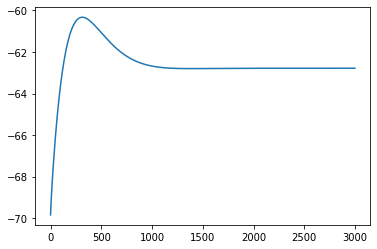

In [138]:
plt.plot(traces[:,1519])

In [135]:
spikesDF['node_ids'][spikesDF['node_ids'] == 1].keys()[0]

0

In [144]:
spikingCellIDs = np.unique(np.array(spikesDF['node_ids'],dtype=int))
spikingCellIDs

array([   1, 1519, 2918])

[   1 1519 2918]


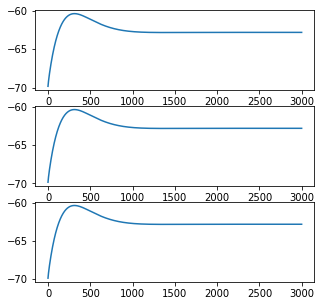

In [128]:
spikingCellIDs = np.unique(np.array(spikesDF['node_ids'],dtype=int))
if len(spikingCellIDs) <=1:
    print('only 1 spiking cell')
    plt.plot(traces)
else:
    
    fig,ax = plt.subplots(len(spikingCellIDs),figsize=(5,5))
    i = 0
    for cell in spikingCellIDs:
        ax[i].plot(traces[:,cell])
        i+=1
    print(spikingCellIDs)


# ECP plotting

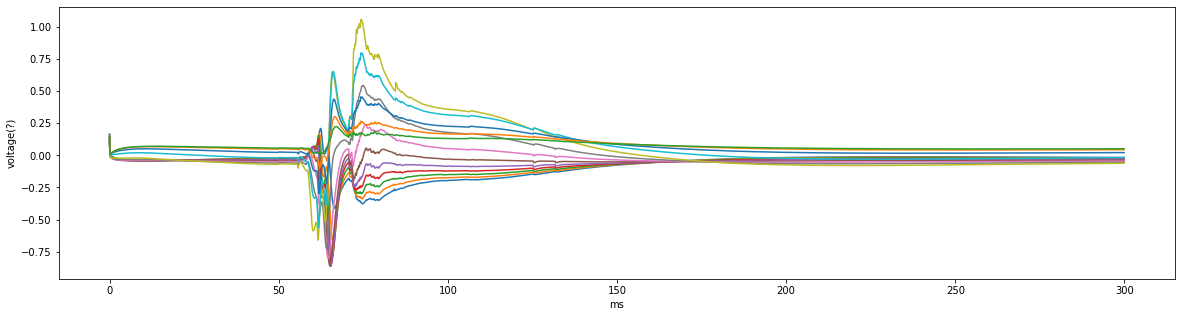

In [6]:
f = h5py.File('output/ecp.h5', 'r')
#f = h5py.File('/home/dpd4k4/CA1_Results/output_10s/ecp.h5', 'r')
data = f['ecp/data'][()]
time = f['ecp/time'][()]
f.close()
start,end = 0, 10000
plt.figure(figsize=(20,5))
plt.plot(np.arange(time[0],time[1],time[2])[start:end],data[start:end,:])
#plt.xlim([175,200])
plt.xlabel('ms')
#plt.ylim([0,0.1])
plt.ylabel('voltage(?)')
#plt.savefig('ecp.png',dpi=400)
plt.show()

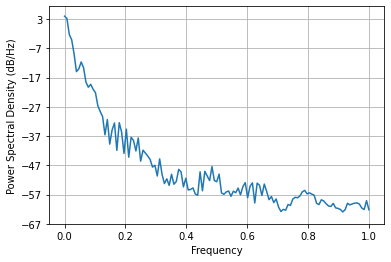

In [7]:
plt.psd(data[:,8])
plt.show()

In [8]:
from scipy import signal
from scipy.signal import hilbert
import numpy as np

In [9]:
#300 samples/ 300 ms  = 10000 samples/second

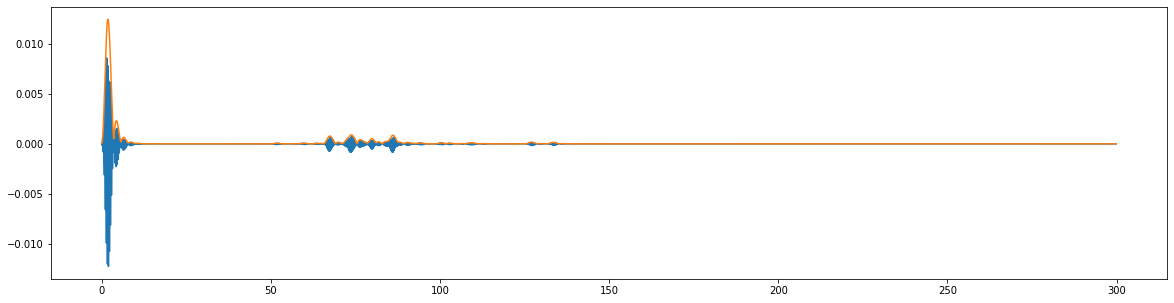

In [11]:
start,end = 0, 10000
Fs = 1000
sos = signal.butter(4, [int(300/(1000/Fs)),int(350/(1000/Fs))], btype='bandpass', fs=1000, output='sos',analog=False)

filtered = signal.sosfilt(sos, data[start:end,0])
plt.figure(figsize=(20,5))
plt.plot(np.arange(time[0],time[1],time[2])[start:end],filtered)
analytical_signal = hilbert(filtered)
amplitude_envelope = np.abs(analytical_signal)
plt.plot(np.arange(time[0],time[1],time[2])[start:end],amplitude_envelope)

In [256]:
np.savetxt('output/filteredLFP.txt',filtered)

In [11]:
start,end = 0, 10000
sos = signal.butter(4, [1,20], btype='bandpass', fs=10000, output='sos',analog=False)
filtered = signal.sosfilt(sos, data[start:end,:])
plt.plot(filtered)

plt.show()

NameError: name 'signal' is not defined

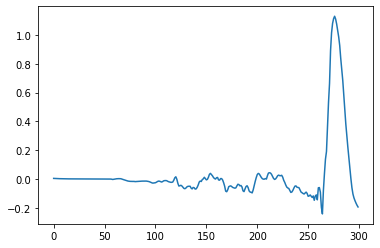

In [288]:
start,end = 1000,1300
sos = signal.butter(1, 50, btype='hp', fs=3000, output='sos',analog=False)
filtered = signal.sosfilt(sos, data[start:end,8])
plt.plot(filtered)

plt.show()

In [ ]:
b, a = signal.butter(4, 100, 'low', analog=True)
w, h = signal.freqs(b, a)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.show()

In [14]:
vclampfile = np.ones((3000))*-63
#np.save("vclamp_input_file.csv",vclampfile)

In [15]:
from scipy import signal

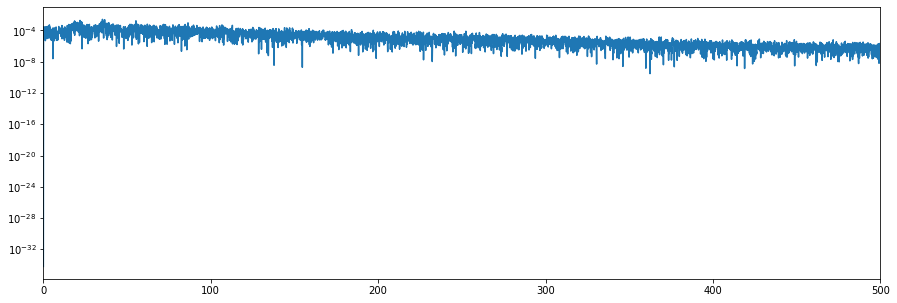

In [289]:
fs = 10000 
f, Pxx_den = signal.periodogram(data[:,8], fs)
plt.figure(figsize=(15,5))
plt.semilogy(f, Pxx_den)
plt.xlim([0,500])
#plt.ylim([10e-10,10-4])
plt.show()

ValueError: only 1-dimensional arrays can be used

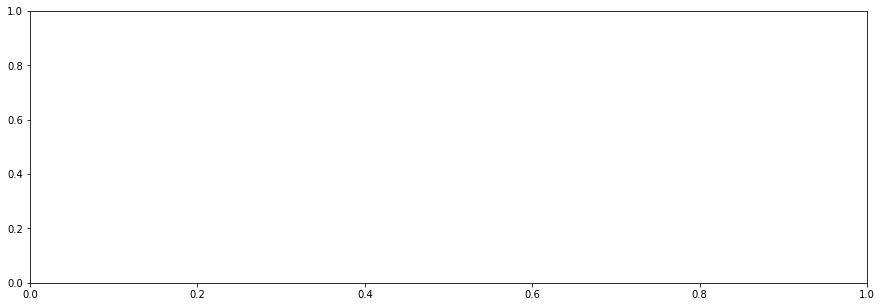

In [290]:
plt.figure(figsize=(15,5))
Pxx,freqs = plt.psd(data,NFFT = fs,noverlap=True)

In [28]:
f = h5py.File(os.path.join('output','spikes.h5'), 'r')
spikesDF = SaveDataToDF(f) 

In [29]:
np.unique(nodesDF['node_type_id'][spikingCellIDs])

NameError: name 'spikingCellIDs' is not defined

In [338]:
f = h5py.File(os.path.join('output','spikes.h5'), 'r')

In [10]:
f = h5py.File(os.path.join('output','voltage_clamp.h5'), 'r')
vclampDat = SaveDataToDF(f)

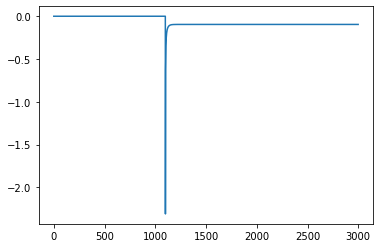

In [30]:
f = h5py.File(os.path.join('output','voltage_clamp.h5'), 'r')
vclampDat = SaveDataToDF(f)
plt.plot(vclampDat['data0'])
np.savetxt('vclamp_AAC_4',vclampDat['data0'])
#plt.savefig('AAC_vclamp.png')

In [164]:
f = h5py.File(os.path.join('output','i_report_syn.h5'), 'r')
iSynnmda = SaveDataToDF(f)

f = h5py.File(os.path.join('output','i_report_syn2.h5'), 'r')
iSynampa = SaveDataToDF(f)

In [31]:
#gids = [27] + srcList[:4]
gids = [1]
#start,end = 1400,1900
start,end = 0,5000
plt.figure(figsize=(15,10))
simTime = np.arange(0,300,0.1)
for gid in gids:
    cellNo = vreports['node_ids'][vreports['node_ids'] == gid].keys()[0]
    name = nodesDF['node_type_id'][vreports['node_ids'][cellNo]]
    plt.plot(simTime[start:end],vreports['data'+str(cellNo)][vreports['data'+str(cellNo)].isna()==False][start:end],label = name+'_'+str(gid))
    plt.plot(simTime[start:end],iSynampa['data8'][start:end]*1000,label='ampa')
    plt.plot(simTime[start:end],iSynnmda['data8'][start:end]*1000,label='nmda')

#plt.ylim([-70,-50])
plt.legend(loc='upper left')

NameError: name 'vreports' is not defined

<Figure size 1080x720 with 0 Axes>

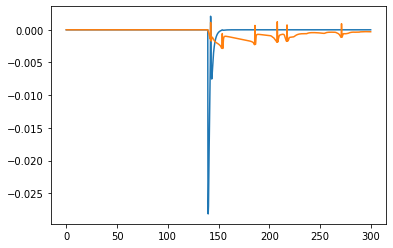

In [197]:
plt.plot(simTime[start:end],iSynampa['data8'],label='ampa')
plt.plot(simTime[start:end],iSynnmda['data8'],label='nmda')

In [217]:
saveVolts = []
for i in range(1084):
    if sum(iSynnmda['data'+str(i)]) != 0:
        saveVolts.append(iSynnmda['data'+str(i)])

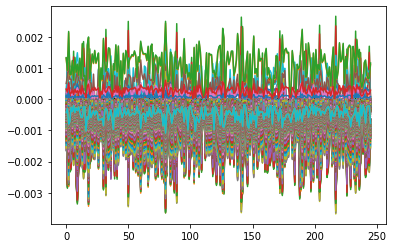

In [212]:
plt.plot(saveVolts)
plt.show()

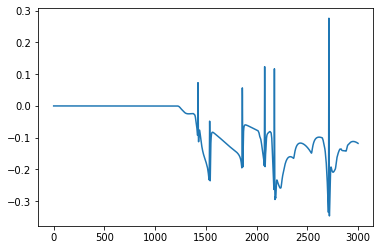

In [220]:
plt.plot(np.sum(np.array(saveVolts),axis=0))

In [173]:
f.close()

# plot individual voltage responses

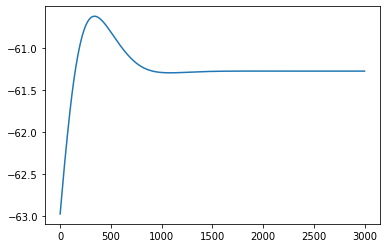

In [36]:
plt.plot(vreports['data110'])

In [8]:
f = h5py.File(os.path.join("output",'v_report.h5'), 'r')
vreports = SaveDataToDF(f)

f = h5py.File(os.path.join('network','biophysical_nodes.h5'), 'r')
nodesDF = SaveDataToDF(f)


#f = h5py.File(os.path.join("output",'v_report_axon.h5'), 'r')
#axonsDF = SaveDataToDF(f)

f = h5py.File(os.path.join('output','spikes.h5'), 'r')
spikesDF = SaveDataToDF(f) 

spikingCellIDs = np.unique(np.array(spikesDF['node_ids'],dtype=int))
print(spikingCellIDs)
print(len(spikingCellIDs))


cellLocations = pd.read_csv('cell_locations.csv')#this was for the old build, i'm just reading it instead of writing the list coz lazy
idNames = np.unique(nodesDF['node_type_id'])
cellNames = np.unique(cellLocations['Cell type'])
array = cellLocations['Cell type']
idxs = np.unique(cellLocations['Cell type'],return_index=True)[1]
cellNames = [array[index] for index in sorted(idxs)]#use the names in the order in which the id's appear

nodesDF = nodesDF.replace({'node_type_id':idNames},{'node_type_id':cellNames})

[    0     1     2 ... 19999 20000 20001]
8477


In [412]:
nodesDF.to_csv('nodePositions.csv')

# find how many cells of each type spike in the simulation

In [72]:
f = h5py.File(os.path.join('output','spikes.h5'), 'r')
spikesDF = SaveDataToDF(f) 
idTypes = pd.DataFrame(nodesDF['node_type_id'][spikesDF['node_ids']])
idTypes.columns = ['node_type_id']
idTypes.index = range(0,len(spikesDF))#concat does not handle different indices, even if ignore_index=True for some reason

spikesDFM = pd.concat([spikesDF,idTypes],axis=1)
print(spikesDFM.keys())
spikesDFM.groupby('node_type_id').apply(len)

Index(['node_ids', 'timestamps', 'node_type_id'], dtype='object')


node_type_id
AAC in SO layer      47
AAC in SP layer     151
AAC in SR layer       8
OLM in SO layer     423
PV in SO layer      112
PV in SP layer      354
PV in SR layer       34
Pyr in SP layer    5200
dtype: int64

In [88]:
cellName = 'Pyr'
# ids which spike in the simulation
un = spikesDFM[spikesDFM['node_type_id'].str.contains(cellName)]['node_ids']
unIDs = np.unique(un)
#print(unIDs)
print(str(len(unIDs))+' spiking '+ cellName+'s')
# get a DF with the unique ids, the number of times each unique id fires:
allCells = spikesDFM.loc[un.index].groupby('node_ids').apply(len).to_frame()
allCells.columns = ['counts']

4042 spiking Pyrs


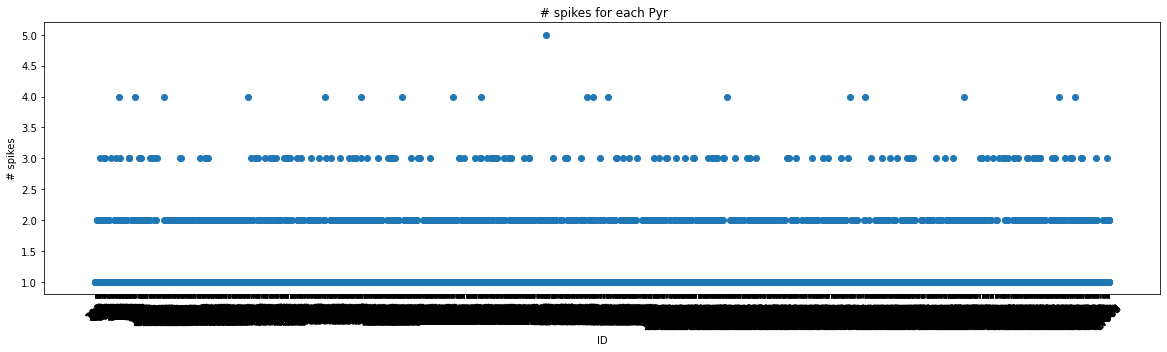

In [395]:
plt.figure(figsize=(20,5))
#plt.bar(allCells.index,allCells['counts'].values,width=0.2,align='center')
plt.scatter(allCells.index,allCells['counts'].values)
plt.title(' # spikes for each '+cellName)
plt.xlabel('ID')
plt.ylabel('# spikes')
plt.xticks(allCells.index,rotation=45,fontsize=10)

plt.show()

In [128]:
starttime, endtime = 195, 205
typeDF  = spikesDFM[spikesDFM['node_type_id'].str.contains('Pyr')]
res = typeDF[(typeDF['timestamps'] < endtime) & (typeDF['timestamps'] > starttime)]
print(len(res))
len(np.unique(res['node_ids']))

3


3

In [129]:
res

,node_ids,timestamps,node_type_id
255,3651.0,197.1,Pyr in SP layer
5030,8224.0,196.7,Pyr in SP layer
9374,4195.0,197.9,Pyr in SP layer


In [57]:
f = h5py.File(os.path.join("output",'i_report_syn.h5'), 'r')
f.visit(print)
f.close()

# plot voltage of 1 cell

In [31]:
f = h5py.File(os.path.join("output",'v_report.h5'), 'r')
vreports = SaveDataToDF(f)

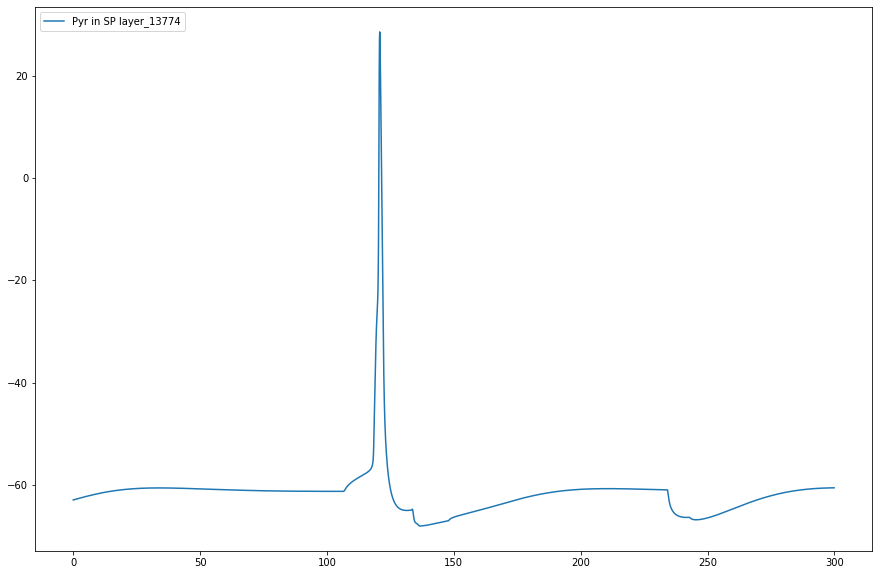

In [32]:
#get vreports first
gids = [13774]
#gids = [18012]
start,end = 0,30000
#start,end = 0,3000
plt.figure(figsize=(15,10))
simTime = np.arange(0,300,0.1)
for gid in gids:
    cellNo = vreports['node_ids'][vreports['node_ids'] == gid].keys()[0]
    name = nodesDF['node_type_id'][vreports['node_ids'][cellNo]]
    plt.plot(simTime[start:end],vreports['data'+str(cellNo)][vreports['data'+str(cellNo)].isna()==False][start:end],label = name+'_'+str(gid))

#plt.ylim([-70,-50])
plt.legend(loc='upper left')
#plt.savefig('OLM.png')
plt.show()

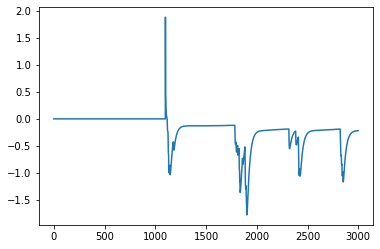

In [12]:
f = h5py.File(os.path.join('output','voltage_clamp.h5'), 'r')
vclampDat = SaveDataToDF(f)
plt.plot(vclampDat['data0'])
np.savetxt('output/vclamp_AAC_15.txt',vclampDat['data0'])
#plt.savefig('AAC_vclamp.png')

# find the spiking cell connected to a given cell id

### cell of a certain type which fires earliest in a given window:

In [27]:
f = h5py.File(os.path.join('updated_conns','biophysical_biophysical_edges.h5'))
synapsesDF = SaveDataToDF(f)

In [23]:
f = h5py.File(os.path.join('network','biophysical_biophysical_edges.h5'), 'r')
edgesDF = SaveDataToDF(f)

f = h5py.File(os.path.join('output','spikes.h5'), 'r')
spikesDF = SaveDataToDF(f) 

namesList = []
for i in range(len(spikesDF['node_ids'])):
    namesList.append(nodesDF['node_type_id'][spikesDF['node_ids'][i]])
spikesDFM = pd.concat([spikesDF,pd.Series(namesList)],axis=1)
spikesDFM.columns = ['node_ids','timestamps','node_type_id']

### find the target ID of interest

In [20]:
startwindow =  120
cellType = 'Pyr in SP layer'

In [21]:
cellTypeTimes = spikesDFM[spikesDFM['node_type_id'] == cellType]['timestamps'].values
IDX = np.where(cellTypeTimes == np.min(cellTypeTimes[cellTypeTimes > startwindow]))[0][0]#earliest time this cell type spikes after the startwindow
print(spikesDFM[spikesDFM['node_type_id'] == cellType].iloc[IDX])
nodeID = (spikesDFM[spikesDFM['node_type_id'] == cellType].iloc[IDX])['node_ids']#node id of the cell which spikes, better be of the cell type given above

node_ids                  13774
timestamps                120.4
node_type_id    Pyr in SP layer
Name: 829, dtype: object


### get the spiking sources to this target

In [24]:
Sids = edgesDF[edgesDF['target_node_id'] == nodeID]['source_node_id']#source ids of the cells that synapse onto this one 
srcList = []
srcTypeList = []
for i in range(len(Sids)):
    if len(spikesDFM[spikesDFM['node_ids']==Sids.iloc[i]]) > 0:# AND spike
        srcList.append(Sids.iloc[i])
        #srcTypeList.append(spikesDFM['node_type_id'].iloc[Sids.iloci])
        srcTypeList.append(spikesDFM[spikesDFM['node_ids']==Sids.iloc[i]]['node_type_id'].values[0])

### get the properties of the synapses from the source and save

In [28]:
targetDF = synapsesDF[synapsesDF['target_node_id'] == nodeID]
allsIDs,allSecs,allweights = [],[],[]
for i in range(0,len( targetDF['source_node_id'])):
    if targetDF['source_node_id'].iloc[i] in srcList:
        allsIDs.append(targetDF['sec_id'].values[i])
        allSecs.append(targetDF['sec_x'].values[i])
        allweights.append(targetDF['syn_weight'].values[i][0])
        
        
        

In [29]:
TargetPropsDF = pd.DataFrame({'sec_id':allsIDs,'sec_x':allSecs,'syn_weight':allweights,'source_type':srcTypeList},index = srcList)
TargetPropsDF.index.name = 'source_IDs'
TargetPropsDF.to_csv('TargetPropsDF.csv')

In [30]:
TargetPropsDF

,sec_id,sec_x,syn_weight,source_type
source_IDs,,,,
27.0,6.0,0.5,0.208340,AAC in SO layer
39.0,6.0,0.5,0.641454,AAC in SO layer
41.0,6.0,0.5,0.409431,AAC in SO layer
100.0,6.0,0.5,0.200000,AAC in SO layer
114.0,6.0,0.5,0.200000,AAC in SO layer
133.0,6.0,0.5,0.112749,AAC in SO layer
148.0,6.0,0.5,0.200000,AAC in SO layer
18877.0,6.0,0.5,0.200000,AAC in SP layer
18878.0,6.0,0.5,0.200000,AAC in SP layer


### get the spike times from the sources and save

In [168]:
#keep only the source ids which spike during the simulation AND have the target ID of the nodeID
allindicies = []
for source in srcList:
    allindicies.append(spikesDFM[spikesDFM['node_ids']==source].index)
allindicies_flattened = np.concatenate([list(item) for item in allindicies])

gbDF = spikesDFM.loc[allindicies_flattened]#rows with all the spiking cells which synapse onto the nodeID selected above
sources = gbDF['node_ids'].unique()
eventTimes = []
for group in gbDF.groupby('node_ids'):
    eventTimes.append(group[1]['timestamps'].values)
maxlen = max(map(len, eventTimes))
np.savetxt('ETs.txt',np.array(list((map(lambda x: np.hstack((x,np.zeros(maxlen- len(x)))),eventTimes)))))

# find the node ids of sources and targets of a particular type

In [71]:
f = h5py.File(os.path.join('updated_conns','biophysical_biophysical_edges.h5'))
synapsesDF = SaveDataToDF(f)
srcs = nodesDF.iloc[synapsesDF['source_node_id']]
trgts = nodesDF.iloc[synapsesDF['target_node_id']]
PyrIDs = list(set(trgts[trgts['node_type_id'].str.contains('Pyr')]['node_id']))
PVIDs = list(set(srcs[srcs['node_type_id'].str.contains('PV')]['node_id']))
PV2Pyr = synapsesDF[(synapsesDF['source_node_id'].isin(PVIDs)) & (synapsesDF['target_node_id'].isin(PyrIDs))]

In [256]:
specific_targets = PV2Pyr[PV2Pyr['source_node_id'] == 721]['target_node_id']

In [67]:
PV2Pyr[PV2Pyr['source_node_id'] == 19608]['target_node_id']

26730       5000.0
35764      10350.0
38539      11900.0
40633      13150.0
40730      13200.0
42679      14400.0
47055      16900.0
47709      17300.0
49120      18200.0
79323       1251.0
79423       1301.0
81301       2451.0
83641       3801.0
86880       5601.0
90883       7951.0
93931       9701.0
94461      10051.0
95425      10651.0
103945     15651.0
109019     18651.0
140645      3252.0
145850      6252.0
151016      9252.0
153050     10302.0
153233     10402.0
154247     10952.0
154635     11152.0
157016     12602.0
159144     13752.0
162422     15702.0
            ...   
2716459    15447.0
2717378    15997.0
2717536    16097.0
2718216    16447.0
2718925    16847.0
2720036    17447.0
2722183    18697.0
2751915     2848.0
2753926     4048.0
2755491     5048.0
2760153     7798.0
2762368     9048.0
2762437     9098.0
2762947     9398.0
2763539     9748.0
2764238    10148.0
2764964    10548.0
2765215    10698.0
2767145    11898.0
2771780    14648.0
2771881    14698.0
2773863    1

In [77]:
f = h5py.File(os.path.join("output",'v_report.h5'), 'r')
vreports = SaveDataToDF(f)

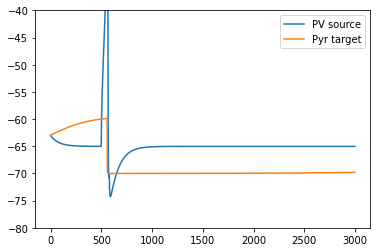

In [79]:
plt.plot(vreports[f"data{vreports[vreports['node_ids'] == 19608].index[0]}"],label='PV source')
plt.plot(vreports[f"data{vreports[vreports['node_ids'] == 14698].index[0]}"],label = 'Pyr target')
plt.ylim([-80,-40])
plt.legend()
plt.show()

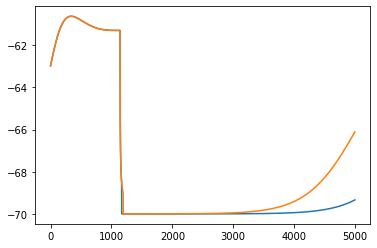

In [201]:
plt.plot(vreports['source_node_id'])
#plt.plot(vreports[f"data{PyrIDs[0]}"])

# view synaptic weights

In [59]:
f = h5py.File(os.path.join('updated_conns','biophysical_biophysical_edges.h5'))
synapsesDF = SaveDataToDF(f)
srcs = nodesDF.iloc[synapsesDF['source_node_id']]

#srcs.columns = ['source_node_id', 'node_type_id']
trgts = nodesDF.iloc[synapsesDF['target_node_id']]

In [60]:
srcs = nodesDF.iloc[synapsesDF['source_node_id']]

#srcs.columns = ['source_node_id', 'node_type_id']
trgts = nodesDF.iloc[synapsesDF['target_node_id']]

In [61]:
srcs.groupby('node_type_id').apply(len)


node_type_id
AAC in SO layer     28455
AAC in SP layer    130655
AAC in SR layer      4650
OLM in SO layer    149202
PV in SO layer      45026
PV in SP layer     192235
PV in SR layer       8205
Pyr in SP layer    436645
dtype: int64

In [62]:
newNP = np.concatenate((np.array(srcs['node_type_id']).reshape(-1,1),np.array(trgts['node_type_id']).reshape(-1,1)),axis=1)


In [63]:
newNP = np.hstack((newNP,np.array(synweightsDF['syn_weight']).reshape(-1,1)))
newNP = np.hstack((newNP,np.array(synweightsDF)))
newDF = pd.DataFrame(newNP,columns = ['source','target','weight'])

NameError: name 'synweightsDF' is not defined

In [ ]:
df = synapsesDF['syn_weight']
df.columns = ['syn_weight','Nans']
df = df.drop(['Nans'],axis=1)
synweightsDF = df

In [ ]:
newNP = np.concatenate((np.array(srcs['node_type_id']).reshape(-1,1),np.array(trgts['node_type_id']).reshape(-1,1)),axis=1)
newNP = np.hstack((newNP,np.array(synweightsDF['syn_weight']).reshape(-1,1)))
newDF = pd.DataFrame(newNP,columns = ['source','target','weight'])


In [ ]:
mean,std,Range = np.mean(Pyr2Chn['weight']), np.std(Pyr2Chn['weight']), max(Pyr2Chn['weight']) -  min(Pyr2Chn['weight'])

In [ ]:
plt.hist(Pyr2Chn['weight'])
plt.title('Pyr->AAC')
mean,std,Range

In [ ]:
Pyr2Chn = newDF[newDF['source'].str.contains('Pyr') & newDF['target'].str.contains('AAC')]

In [223]:
newDF.groupby(['source','target']).apply(np.mean)

NameError: name 'newDF' is not defined

In [ ]:
newDF['source'].contains('Pyr')

In [426]:
nodesDF

,positions0,positions1,positions2,node_group_id,node_group_index,node_id,node_type_id
0,120,360,380,0,0,0,AAC in SO layer
1,140,140,420,0,1,1,AAC in SO layer
2,0,640,460,0,2,2,AAC in SO layer
3,180,720,320,0,3,3,AAC in SO layer
4,300,860,460,0,4,4,AAC in SO layer
5,340,220,360,0,5,5,AAC in SO layer
6,240,460,440,0,6,6,AAC in SO layer
7,300,240,340,0,7,7,AAC in SO layer
8,300,600,380,0,8,8,AAC in SO layer
9,100,920,420,0,9,9,AAC in SO layer


In [425]:
synapsesDF

,sec_id,sec_x,syn_weight,syn_weight,edge_group_id,edge_group_index,edge_type_id,node_id_to_range0,node_id_to_range1,range_to_edge_id0,range_to_edge_id1,node_id_to_range0,node_id_to_range1,range_to_edge_id0,range_to_edge_id1,source_node_id,target_node_id
0,6.0,0.5,0.368962,NaN,0.0,0.0,101.0,0.0,229.0,5252.0,5253.0,0.0,1.0,0.0,188.0,1114.0,0.0
1,6.0,0.5,0.738554,NaN,0.0,1.0,101.0,229.0,370.0,6800.0,6801.0,1.0,2.0,17895.0,18009.0,1239.0,0.0
2,6.0,0.5,0.302391,NaN,0.0,2.0,101.0,370.0,526.0,8165.0,8166.0,2.0,3.0,36201.0,36333.0,1277.0,0.0
3,6.0,0.5,0.470166,NaN,0.0,3.0,101.0,526.0,719.0,24822.0,24823.0,3.0,4.0,54158.0,54329.0,1453.0,0.0
4,6.0,0.5,0.265997,NaN,0.0,4.0,101.0,719.0,855.0,24886.0,24887.0,4.0,5.0,71606.0,71721.0,1591.0,0.0
5,6.0,0.5,0.440463,NaN,0.0,5.0,101.0,855.0,1014.0,26671.0,26672.0,5.0,6.0,89486.0,89633.0,1617.0,0.0
6,6.0,0.5,0.160184,NaN,0.0,6.0,101.0,1014.0,1211.0,29370.0,29371.0,6.0,7.0,107213.0,107401.0,1620.0,0.0
7,6.0,0.5,0.971991,NaN,0.0,7.0,101.0,1211.0,1396.0,30590.0,30591.0,7.0,8.0,125133.0,125261.0,1727.0,0.0
8,6.0,0.5,0.252204,NaN,0.0,8.0,101.0,1396.0,1621.0,30878.0,30879.0,8.0,9.0,142503.0,142665.0,1759.0,0.0
9,6.0,0.5,0.218768,NaN,0.0,9.0,101.0,1621.0,1736.0,31338.0,31339.0,9.0,10.0,160222.0,160333.0,1870.0,0.0


# Connectivity

#### given a convergence, find the connection probability required to ensure this

In [427]:
f = h5py.File(os.path.join('updated_conns','biophysical_biophysical_edges.h5'))
synapsesDF = SaveDataToDF(f)
f = h5py.File(os.path.join('network','biophysical_nodes.h5'), 'r')
nodesDF = SaveDataToDF(f)
cellLocations = pd.read_csv('cell_locations.csv')
idNames = np.unique(nodesDF['node_type_id'])
cellNames = np.unique(cellLocations['Cell type'])
array = cellLocations['Cell type']
idxs = np.unique(cellLocations['Cell type'],return_index=True)[1]
cellNames = [array[index] for index in sorted(idxs)]#use the names in the order in which the id's appear
nodesDF = nodesDF.replace({'node_type_id':idNames},{'node_type_id':cellNames})


In [ ]:
#for example, for AAC-> Pyr, select an AAC, and all the Pyrs in the network.
#calc the distance between this particular AAC and all the Pyrs
# if that distance is <= 400 um, then save it to another data frame. This is the df of all possible connections
# the length of this df is the total possible connnections, so if you know the convergence is 8, then you divide 8 by this length and that is the connection probability that will give you a certain
#convergence

In [77]:
def get_conn_probabilities(nodesDF,src,trgt,convergence,max_dist):

    
    srcs = nodesDF[nodesDF['node_type_id'].str.contains(src)]
    trgts = nodesDF[nodesDF['node_type_id'].str.contains(trgt)]

    xs = srcs['positions0']
    ys = srcs['positions1']
    zs = srcs['positions2']

    all_src_positions = np.vstack((xs,ys,zs)).T

    
    all_conn_probs = []
    for i in range(len(trgts)):

        ref_origin = np.array([trgts.iloc[i]['positions0'],trgts.iloc[i]['positions1'],trgts.iloc[i]['positions2']])


        all_lengths = np.linalg.norm(all_src_positions - ref_origin,axis=1)
        possible_srcs = np.where(all_lengths <= max_dist)[0]
        connection_probability = convergence / len(possible_srcs)
        all_conn_probs.append(connection_probability)
        
    avg_conn_prob = np.mean(all_conn_probs)
    return avg_conn_prob
        
    

In [78]:
src_trgt_params_dict = {'AAC->Pyr' : {'convergence': 6,  'max_dist': 400},
                        'Pyr->AAC' : {'convergence': 116,  'max_dist': 400},
                        'PV->Pyr'  : {'convergence': 17, 'max_dist': 400},
                        'Pyr->PV'  : {'convergence': 116,  'max_dist': 400},
                        'PV->AAC'  : {'convergence': 10,  'max_dist': 400},
                        'PV->PV'   : {'convergence': 10,  'max_dist': 400},
                        'OLM->Pyr' : {'convergence': 8,  'max_dist': 400},
                        'OLM->AAC' : {'convergence': 8,   'max_dist': 400},
                        'OLM->PV'  : {'convergence': 8,   'max_dist': 400},
                        'OLM->OLM' : {'convergence': 8,   'max_dist': 400},
                        'Pyr->OLM' : {'convergence': 116,  'max_dist': 400},                   
                       }

In [79]:
conn_probs_dict = {}

for pair in src_trgt_params_dict:
    src = pair.split('-')[0]
    trgt = pair.split('>')[1]
    conn_probs_dict.update({pair:get_conn_probabilities(nodesDF,src,trgt,src_trgt_params_dict[pair]['convergence'],src_trgt_params_dict[pair]['max_dist'])})

In [447]:
conn_probs_dict

{'AAC->Pyr': 0.016836532258865503,
 'Pyr->AAC': 0.01206740760589156,
 'PV->Pyr': 0.03500475478319436,
 'Pyr->PV': 0.011893423056107025,
 'PV->AAC': 0.021181751740933976,
 'PV->PV': 0.02087643303869073,
 'OLM->Pyr': 0.022421702228524548,
 'OLM->AAC': 0.02308474181918634,
 'OLM->PV': 0.02276038635664452,
 'OLM->OLM': 0.02221677850757065,
 'Pyr->OLM': 0.01219861425065592}

### using a gaussian connection probability

In [64]:
from scipy import stats
#E->I
mean = 0.12  # Mean of the Gaussian distribution
std_dev = 99.25  # Standard deviation of the Gaussian distribution
size = 1000  # Size of the random sample

# Generate a random sample from the Gaussian distribution
data = stats.norm.rvs(loc=mean, scale=std_dev, size=size)

In [65]:
srcs = nodesDF[nodesDF['node_type_id'].str.contains('AAC')]

In [67]:
mean = 0
std_dev = 96.6
pmax = 0.15

# Generate x values for the distribution
x = np.arange(-300,300)

# Compute the unscaled PDF values
pdf_values = stats.norm.pdf(x, loc=mean, scale=std_dev)

# scale the PDF and choose only distances 0-300 to match figure 2
scaled_pdf_values = pdf_values * (pmax / np.max(pdf_values))
scaled_pdf_values = scaled_pdf_values[300:]

#put it in a df for ease of lookup
pdf_lookup = pd.DataFrame(scaled_pdf_values)


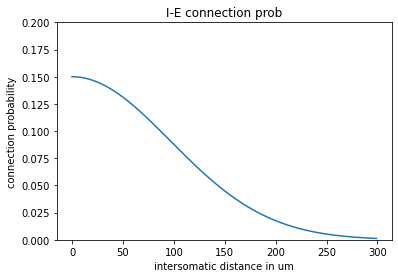

In [68]:
plt.plot(scaled_pdf_values)
plt.title('I-E connection prob')
plt.xlabel('intersomatic distance in um')
plt.ylabel('connection probability')
plt.ylim([0,0.2])
plt.show()


In [328]:
pdf_lookup.iloc[100]

0    0.087779
Name: 100, dtype: float64

#### we want a conection probability such that for  source_num samples we get the given convergence.


In [335]:
srcs = nodesDF[nodesDF['node_type_id'].str.contains('AAC')]
trgts = nodesDF[nodesDF['node_type_id'].str.contains('Pyr')]

xs = srcs['positions0']
ys = srcs['positions1']
zs = srcs['positions2']

all_src_positions = np.vstack((xs,ys,zs)).T


xs = trgts['positions0']
ys = trgts['positions1']
zs = trgts['positions2']

all_trgt_positions = np.vstack((xs,ys,zs)).T


squared_distances = np.sum((all_src_positions[:, np.newaxis, :] - all_trgt_positions) ** 2, axis=2)
euclidean_distances = np.sqrt(squared_distances)
collect = []
for i in range(euclidean_distances.shape[0]):
    possible_srcs = np.where(euclidean_distances[:,i] <= 400)[0]
    connection_probability = 6 / len(possible_srcs)
    collect.append(connection_probability)
np.mean(collect)

0.016733262194592573

In [148]:
def get_conn_probs_V2(nodesDF,src,trgt,convergence,max_dist):
    srcs = nodesDF[nodesDF['node_type_id'].str.contains(src)]
    trgts = nodesDF[nodesDF['node_type_id'].str.contains(trgt)]

    xs = srcs['positions0']
    ys = srcs['positions1']
    zs = srcs['positions2']

    all_src_positions = np.vstack((xs,ys,zs)).T


    xs = trgts['positions0']
    ys = trgts['positions1']
    zs = trgts['positions2']

    all_trgt_positions = np.vstack((xs,ys,zs)).T


    squared_distances = np.sum((all_src_positions[:, np.newaxis, :] - all_trgt_positions) ** 2, axis=2)
    euclidean_distances = np.sqrt(squared_distances)
    
    
    
    collect = []
    for i in range(euclidean_distances.shape[1]):
        possible_srcs = np.where(euclidean_distances[:,i] <= max_dist)[0]
        connection_probability = convergence / len(possible_srcs)
        collect.append(connection_probability)
    return np.mean(collect)

In [ ]:
def get_conn_probs_E2I(nodesDF,src,trgt,convergence,max_dist):
    srcs = nodesDF[nodesDF['node_type_id'].str.contains(src)]
    trgts = nodesDF[nodesDF['node_type_id'].str.contains(trgt)]

    xs = srcs['positions0']
    ys = srcs['positions1']
    zs = srcs['positions2']

    all_src_positions = np.vstack((xs,ys,zs)).T


    xs = trgts['positions0']
    ys = trgts['positions1']
    zs = trgts['positions2']

    all_trgt_positions = np.vstack((xs,ys,zs)).T


    squared_distances = np.sum((all_src_positions[:, np.newaxis, :] - all_trgt_positions) ** 2, axis=2)
    euclidean_distances = np.sqrt(squared_distances)
    
    
    
    collect = []
    for i in range(euclidean_distances.shape[1]):
        possible_srcs = np.where(euclidean_distances[:,i] <= max_dist)[0]
        connection_probability = convergence / len(possible_srcs)
        collect.append(connection_probability)
    return np.mean(collect)

In [150]:
conn_probs_dict = {}

for pair in src_trgt_params_dict:
    src = pair.split('-')[0]
    trgt = pair.split('>')[1]
    conn_probs_dict.update({pair:get_conn_probs_V2(nodesDF,src,trgt,src_trgt_params_dict[pair]['convergence'],src_trgt_params_dict[pair]['max_dist'])})
conn_probs_dict

{'AAC->Pyr': 0.016836532258865503,
 'Pyr->AAC': 0.01206740760589156,
 'PV->Pyr': 0.03500475478319436,
 'Pyr->PV': 0.011893423056107025,
 'PV->AAC': 0.021181751740933976,
 'PV->PV': 0.02087643303869073,
 'OLM->Pyr': 0.022421702228524548,
 'OLM->AAC': 0.02308474181918634,
 'OLM->PV': 0.02276038635664452,
 'OLM->OLM': 0.02221677850757065,
 'Pyr->OLM': 0.01219861425065592}

(array([  7.,  26.,  60., 178., 241., 239., 161.,  67.,  20.,   1.]),
 array([-322.32764318, -256.87877332, -191.42990345, -125.98103358,
         -60.53216371,    4.91670616,   70.36557602,  135.81444589,
         201.26331576,  266.71218563,  332.1610555 ]),
 <BarContainer object of 10 artists>)

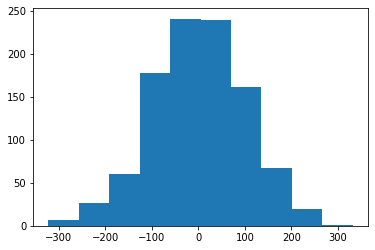

In [9]:
plt.hist(data)

In [ ]:
#given possible srcs samples, and a normal distribution of fixed mean and std, what prob do i need to multiply the samples by to get the convergence?


In [178]:
mean = 0  # Mean of the Gaussian distribution
std_dev = 1  # Standard deviation of the Gaussian distribution
size = 1  # Number of samples to generate

# Sample from the Gaussian distribution
samples = stats.norm.rvs(loc=mean, scale=std_dev, size=size)

In [179]:
samples

1.7385365886470974

In [338]:
#e->i
mean = 0.12
std = 99.25
size = srcs.shape[0] 
res  = stats.norm.rvs(loc=mean, scale=std, size=size)
res = np.abs(res[res>0])
prob = 6 / len(res)

In [786]:
def test_func(dist, connection_prob):
    seed_value = 123
    np.random.seed(seed_value)
    #i>e
    mean = 0.15
    std = 99.98
    
    #e>i
    #mean = 0.12
    #std = 99.25
    size = srcs.shape[0] 
    sample = np.random.normal(loc=mean, scale=std, size=1)
    prob = np.abs(sample / 300)
    test_prob = connection_prob
   # dist = 200
    if prob < 1:
        res = (prob * dist) /300
        if res > test_prob:
            return 0,0
        else:
            return 1,dist
    

In [340]:
def test_func(srcs, trgts, dist,pdf_lookup):
    seed_value = 123
    np.random.seed(seed_value)
    
    if dist <= 300:
        
        test_prob = np.random.uniform()
        #print(pdf_lookup.iloc[int(dist)].iloc[0])
        dist_conn_prob = pdf_lookup.iloc[int(dist)].iloc[0]

        if test_prob <= dist_conn_prob:
            return 1, dist
        else:
            return 0

In [410]:
srcs = nodesDF[nodesDF['node_type_id'].str.contains('AAC')]
trgts = nodesDF[nodesDF['node_type_id'].str.contains('Pyr')]

xs = srcs['positions0']
ys = srcs['positions1']
zs = srcs['positions2']

all_src_positions = np.vstack((xs,ys,zs)).T


xs = trgts['positions0']
ys = trgts['positions1']
zs = trgts['positions2']

all_trgt_positions = np.vstack((xs,ys,zs)).T


squared_distances = np.sum((all_src_positions[:, np.newaxis, :] - all_trgt_positions) ** 2, axis=2)
euclidean_distances = np.sqrt(squared_distances)

seed_value = 123
np.random.seed(seed_value)

all_conns, all_dist = [],[]
for i in range(trgts.shape[0]):
    dist = euclidean_distances[:,i]
    dist = dist[dist<300]
    
    for j in range(len(dist)):
        
        dist_conn_prob = pdf_lookup.iloc[int(dist[j])].iloc[0]
        test_prob = np.random.uniform()
        if test_prob <= dist_conn_prob:
            all_conns.append(i)
            all_dist.append(dist)
        else:
            continue
        
    

In [415]:
a, counts,  = np.unique(all_conns,return_counts=True)

In [424]:
3000 in pdf_lookup.index

False

In [413]:
len(all_dist)

164004

In [392]:
dist = euclidean_distances[:,0]
potential_conns = dist[dist<300]

In [409]:

for j in range(euclidean_distances.shape[1]):
    
    dist = euclidean_distances[:,j]
    potential_conns = dist[dist<300]
    for i in range(len(potential_conns)):
        seed_value = 123
        np.random.seed(seed_value)
        test_prob = np.random.uniform()
        dist_conn_prob = pdf_lookup.iloc[int(potential_conns[i])][0]
        if test_prob <= dist_conn_prob:
            print(potential_conns[i])
    

KeyboardInterrupt: 

In [367]:
res_dist = np.concatenate(all_dist)
res_conns = np.array(all_conns)

In [386]:
pdf_lookup.iloc[100][0]

0.08777872887269726

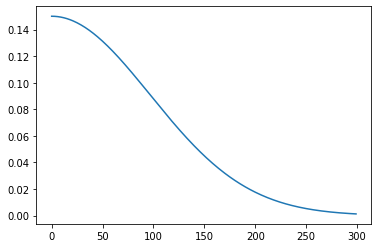

In [382]:
plt.plot(pdf_lookup)

In [370]:
a, counts = np.unique(res_conns,return_counts=True)

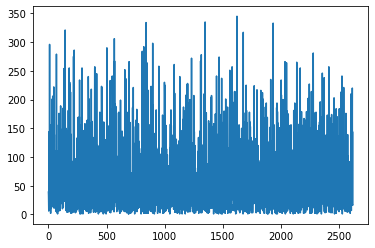

In [373]:
plt.plot(counts)

(array([ 441258., 1696446., 2703405., 3713756., 4687159., 5584035.,
        5979076., 6171579., 6269812., 6127620.]),
 array([  2.        ,  31.79799993,  61.59599987,  91.3939998 ,
        121.19199973, 150.98999967, 180.7879996 , 210.58599953,
        240.38399947, 270.1819994 , 299.97999933]),
 <BarContainer object of 10 artists>)

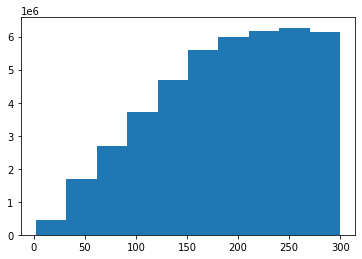

In [364]:
plt.hist(res_dist)

In [387]:
1e6

1000000.0

In [719]:
len(res[res == 0])

647

In [720]:
len(res[res == 1])

6

In [802]:
euclidean_distances.shape

(653, 17800)

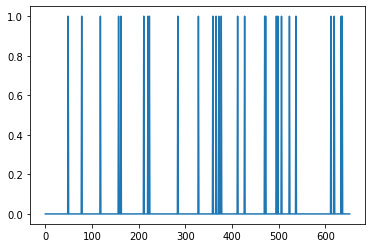

In [847]:
srcs = nodesDF[nodesDF['node_type_id'].str.contains('AAC')]
trgts = nodesDF[nodesDF['node_type_id'].str.contains('Pyr')]

xs = srcs['positions0']
ys = srcs['positions1']
zs = srcs['positions2']

all_src_positions = np.vstack((xs,ys,zs)).T


xs = trgts['positions0']
ys = trgts['positions1']
zs = trgts['positions2']

all_trgt_positions = np.vstack((xs,ys,zs)).T


squared_distances = np.sum((all_src_positions[:, np.newaxis, :] - all_trgt_positions) ** 2, axis=2)
euclidean_distances = np.sqrt(squared_distances)
#srcs = nodesDF[nodesDF['node_type_id'].str.contains('AAC')]
#trgts = nodesDF[nodesDF['node_type_id'].str.contains('Pyr')]
test = np.abs(np.random.normal(loc=mean, scale=std, size=euclidean_distances.shape[1] )) /300
test = test[test<1]

allres,alldist = [],[]
for i in range(euclidean_distances.shape[0]):
    res,num = test_func(euclidean_distances[3,i],0.1)
    allres.append(res)
    alldist.append(num)
allres = np.array(allres)
alldist = np.array(alldist)
plt.plot(allres)


In [848]:
len(allres[allres==0])

626

In [849]:
len(allres[allres==1])

27

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([58.04912467, 58.14912467, 58.24912467, 58.34912467, 58.44912467,
        58.54912467, 58.64912467, 58.74912467, 58.84912467, 58.94912467,
        59.04912467]),
 <BarContainer object of 10 artists>)

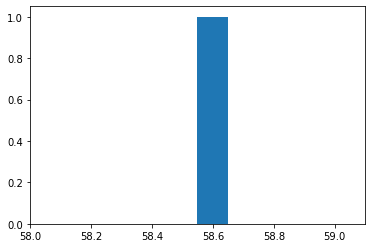

In [833]:
plt.hist(alldist)

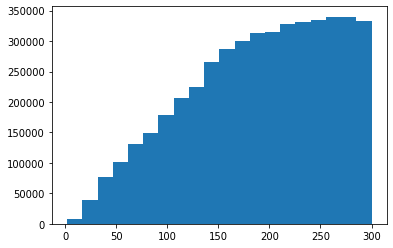

In [600]:
hist_values, bins = np.histogram(euclidean_distances[euclidean_distances<300], bins=20)

# Compute bin centers
bin_centers = (bins[:-1] + bins[1:]) / 2

# Plot the histogram using bar plot
plt.bar(bin_centers, hist_values, width=(bins[1] - bins[0]))
plt.show()

In [601]:
ps = euclidean_distances[euclidean_distances<300]

In [614]:
6/np.mean(ps)

0.031639683862599

In [548]:
mean = 0.12
std = 99.25
size = srcs.shape[0] 
res  = stats.norm.rvs(loc=mean, scale=std, size=size)
res = res[res>0]




(array([89., 74., 64., 35., 23., 22.,  7.,  6.,  2.,  2.]),
 array([  0.35223406,  30.77458507,  61.19693608,  91.61928709,
        122.0416381 , 152.46398911, 182.88634012, 213.30869112,
        243.73104213, 274.15339314, 304.57574415]),
 <BarContainer object of 10 artists>)

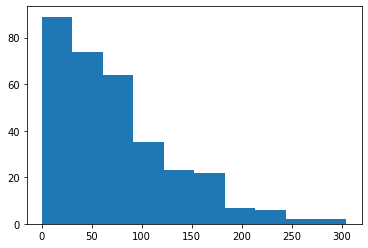

In [549]:
plt.hist(res)

633

17

In [346]:
res2 = 0.018808777429467086 * res

In [450]:
pdf[pdf > 1]

array([1.02185328, 1.04972231])

(array([2414., 2140., 1795., 1354.,  930.,  633.,  355.,  220.,   74.,
          59.]),
 array([3.01267230e-05, 9.98382385e-02, 1.99646350e-01, 2.99454462e-01,
        3.99262574e-01, 4.99070686e-01, 5.98878798e-01, 6.98686909e-01,
        7.98495021e-01, 8.98303133e-01, 9.98111245e-01]),
 <BarContainer object of 10 artists>)

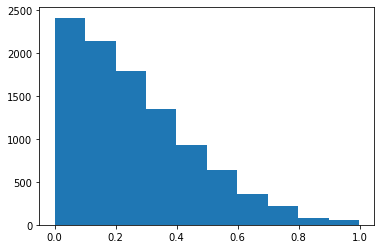

In [452]:
plt.hist(pdf)

In [354]:
test = np.random.uniform()
if test > prob:
    return 0
else:
    return 1

(array([72., 56., 56., 47., 38., 22., 13.,  3.,  7.,  5.]),
 array([4.99584464e-04, 4.89093856e-01, 9.77688127e-01, 1.46628240e+00,
        1.95487667e+00, 2.44347094e+00, 2.93206521e+00, 3.42065948e+00,
        3.90925376e+00, 4.39784803e+00, 4.88644230e+00]),
 <BarContainer object of 10 artists>)

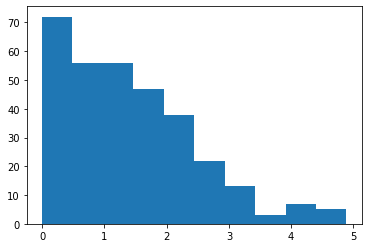

In [347]:
plt.hist(res2)

In [332]:
srcs = nodesDF[nodesDF['node_type_id'].str.contains('AAC')]
srcs.shape[0]

653

In [329]:
srcs = nodesDF[nodesDF['node_type_id'].str.contains('AAC')]
num_samples = srcs.shape[0]
mean = 0.12
std = 99.25
data = stats.norm.rvs(loc=mean, scale=std, size=num_samples)
data = data[np.where(data >0)]
bins = np.histogram(data)

In [184]:
bins = np.histogram(data)

In [330]:
bins[0]

array([80, 80, 51, 46, 28, 17, 14,  2,  1,  2])

In [187]:
bins[1]

array([2.00635329e-01, 3.27283323e+01, 6.52560293e+01, 9.77837263e+01,
       1.30311423e+02, 1.62839120e+02, 1.95366817e+02, 2.27894514e+02,
       2.60422211e+02, 2.92949908e+02, 3.25477605e+02])

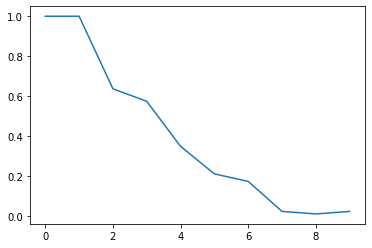

In [331]:
plt.plot(bins[0]/max(bins[0]))

#### find the convergence for each pair using the saved edges

In [428]:
f = h5py.File(os.path.join('updated_conns','biophysical_biophysical_edges.h5'))
synapsesDF = SaveDataToDF(f)

In [429]:
srcs = nodesDF.iloc[synapsesDF['source_node_id']]

#srcs.columns = ['source_node_id', 'node_type_id']
trgts = nodesDF.iloc[synapsesDF['target_node_id']]

In [430]:
def get_sids_to_tids(synapsesDF,src,trgt):

    sids = list(set(trgts[trgts['node_type_id'].str.contains(src)]['node_id']))
    tids = list(set(srcs[srcs['node_type_id'].str.contains(trgt)]['node_id']))
    
    sid_to_tid = synapsesDF[(synapsesDF['source_node_id'].isin(sids)) & (synapsesDF['target_node_id'].isin(tids))]
    num_sids = len(np.unique(sid_to_tid['source_node_id']))
    if num_sids == 0:
        return 0, 0
    return num_sids, sid_to_tid



In [431]:
key_names = [('AAC','Pyr'),
             ('Pyr','AAC'),
             ('PV','Pyr'),
             ('Pyr','PV'),
             ('PV','AAC'),
             ('PV','PV'),
             ('OLM','Pyr'),
             ('OLM','AAC'),
             ('OLM','PV'),
             ('OLM','OLM'),
             ('Pyr','OLM')
              ]

In [432]:
s2t_dict = {}

for pair in key_names:
    num_sids, sids_to_tids = get_sids_to_tids(synapsesDF,pair[0],pair[1])
    if num_sids == 0:
        continue
    tids_nums = pd.DataFrame(sids_to_tids.groupby('target_node_id').apply(len))
    avg_num_connections = np.mean(tids_nums)
                                              
    s2t_dict.update({f"{pair[0]}->{pair[1]}": float(avg_num_connections) })
    
    

In [435]:
keys, values = list(s2t_dict.keys()), list(s2t_dict.values())

Text(0, 0.5, 'convergence')

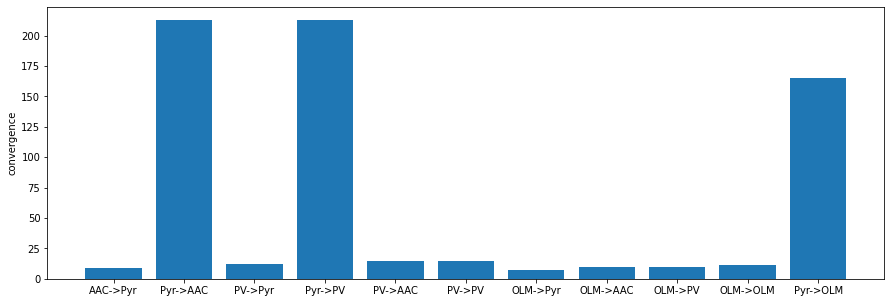

In [469]:
plt.figure(figsize=(15,5))
plt.bar(keys,values)
plt.ylabel('convergence')

In [433]:
s2t_dict

{'AAC->Pyr': 9.20775934776497,
 'Pyr->AAC': 212.41807044410413,
 'PV->Pyr': 12.514834794335806,
 'Pyr->PV': 212.81489841986456,
 'PV->AAC': 14.85099846390169,
 'PV->PV': 14.767494356659142,
 'OLM->Pyr': 7.13169164882227,
 'OLM->AAC': 9.92153846153846,
 'OLM->PV': 9.927502876869966,
 'OLM->OLM': 11.447806354009078,
 'Pyr->OLM': 164.98039215686273}

In [464]:
s2t_dict

{'AAC->Pyr': 6.259407616361072,
 'Pyr->AAC': 122.75191424196018,
 'PV->Pyr': 17.84370786516854,
 'Pyr->PV': 121.96726862302484,
 'PV->AAC': 10.407350689127105,
 'PV->PV': 10.32316384180791,
 'OLM->Pyr': 8.395097818754216,
 'OLM->AAC': 8.50229709035222,
 'OLM->PV': 8.463882618510159,
 'OLM->OLM': 8.309200603318251,
 'Pyr->OLM': 123.31975867269985}

In [454]:
s2t_dict

{'AAC->Pyr': 1.8078038078821594,
 'Pyr->AAC': 2844.1730474732008,
 'PV->Pyr': 9.529415069955611,
 'Pyr->PV': 2088.612866817156,
 'PV->AAC': 14.30781010719755,
 'PV->PV': 10.442437923250564,
 'OLM->Pyr': 3.2014332636607943,
 'OLM->AAC': 8.463901689708141,
 'OLM->PV': 6.448863636363637,
 'OLM->OLM': 8.4947209653092,
 'Pyr->OLM': 2505.232277526395}

In [385]:
s2t_dict

{'AAC->Pyr': 1.8078038078821594,
 'Pyr->AAC': 2844.1730474732008,
 'PV->Pyr': 9.529415069955611,
 'Pyr->PV': 2088.612866817156,
 'PV->AAC': 14.30781010719755,
 'PV->PV': 10.442437923250564,
 'OLM->Pyr': 3.2014332636607943,
 'OLM->AAC': 8.463901689708141,
 'OLM->PV': 6.448863636363637,
 'OLM->OLM': 8.4947209653092,
 'Pyr->OLM': 2505.232277526395}

In [218]:
s2t_dict

{'AAC->Pyr': 26.776741573033707,
 'Pyr->AAC': 97.28943338437979,
 'PV->Pyr': 27.374044943820223,
 'Pyr->PV': 243.76975169300226,
 'PV->AAC': 67.39663093415008,
 'PV->PV': 67.76523702031602,
 'OLM->Pyr': 30.94258426966292,
 'OLM->AAC': 29.30781010719755,
 'OLM->PV': 29.47291196388262,
 'OLM->OLM': 30.22021116138763,
 'Pyr->OLM': 1325.3619909502263}

# view synaptic currents

In [227]:
f = h5py.File(os.path.join('output','syns_chn2pyr.h5'))
data = f['report/biophysical/data'][()]
sids = f['report/biophysical/mapping/src_ids'][()]
tids = f['report/biophysical/mapping/trg_ids'][()]
f.visit(print)
f.close()

report
report/biophysical
report/biophysical/data
report/biophysical/mapping
report/biophysical/mapping/element_ids
report/biophysical/mapping/element_pos
report/biophysical/mapping/index_pointer
report/biophysical/mapping/node_ids
report/biophysical/mapping/src_ids
report/biophysical/mapping/time
report/biophysical/mapping/trg_ids


In [232]:
sidsIdxs = np.array(np.where(sids == 18905)[0])
tidsIdxs = np.array(np.where(tids == 1050)[0])

In [237]:
for sid in sidsIdxs:
    if sid in  tidsIdxs:
        print(sid)

4778


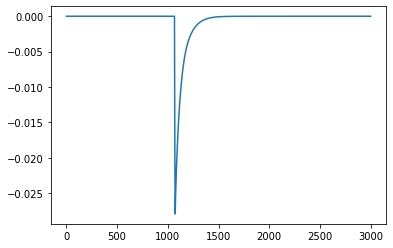

In [238]:
plt.plot(data[:,4778])

# choose a spiking cell and view all the other cells it is connected to which spike
### and then of those, 

In [34]:

f = h5py.File(os.path.join('network','biophysical_nodes.h5'), 'r')
nodesDF = SaveDataToDF(f)
cellLocations = pd.read_csv('cell_locations.csv')#this was for the old build, i'm just reading it instead of writing the list coz lazy
idNames = np.unique(nodesDF['node_type_id'])
cellNames = np.unique(cellLocations['Cell type'])
array = cellLocations['Cell type']
idxs = np.unique(cellLocations['Cell type'],return_index=True)[1]
cellNames = [array[index] for index in sorted(idxs)]#use the names in the order in which the id's appear

nodesDF = nodesDF.replace({'node_type_id':idNames},{'node_type_id':cellNames})

f = h5py.File(os.path.join('output','spikes.h5'), 'r')
spikesDF = SaveDataToDF(f) 

namesList = []
for i in range(len(spikesDF['node_ids'])):
    namesList.append(nodesDF['node_type_id'][spikesDF['node_ids'][i]])
spikesDFM = pd.concat([spikesDF,pd.Series(namesList)],axis=1)
spikesDFM.columns = ['node_ids','timestamps','node_type_id']
spikesDFMM = spikesDFM.merge(nodesDF[['node_id','positions2']], left_on='node_ids',right_on='node_id',how='left')

# raster 

In [3]:
f = h5py.File(os.path.join('network','biophysical_nodes.h5'), 'r')
nodesDF = SaveDataToDF(f)
cellLocations = pd.read_csv('cell_locations.csv')#this was for the old build, i'm just reading it instead of writing the list coz lazy
idNames = np.unique(nodesDF['node_type_id'])
cellNames = np.unique(cellLocations['Cell type'])
array = cellLocations['Cell type']
idxs = np.unique(cellLocations['Cell type'],return_index=True)[1]
cellNames = [array[index] for index in sorted(idxs)]#use the names in the order in which the id's appear

nodesDF = nodesDF.replace({'node_type_id':idNames},{'node_type_id':cellNames})

In [4]:
f = h5py.File(os.path.join('output','spikes.h5'), 'r')
spikesDF = SaveDataToDF(f) 

namesList = []
for i in range(len(spikesDF['node_ids'])):
    namesList.append(nodesDF['node_type_id'][spikesDF['node_ids'][i]])
spikesDFM = pd.concat([spikesDF,pd.Series(namesList)],axis=1)
spikesDFM.columns = ['node_ids','timestamps','node_type_id']

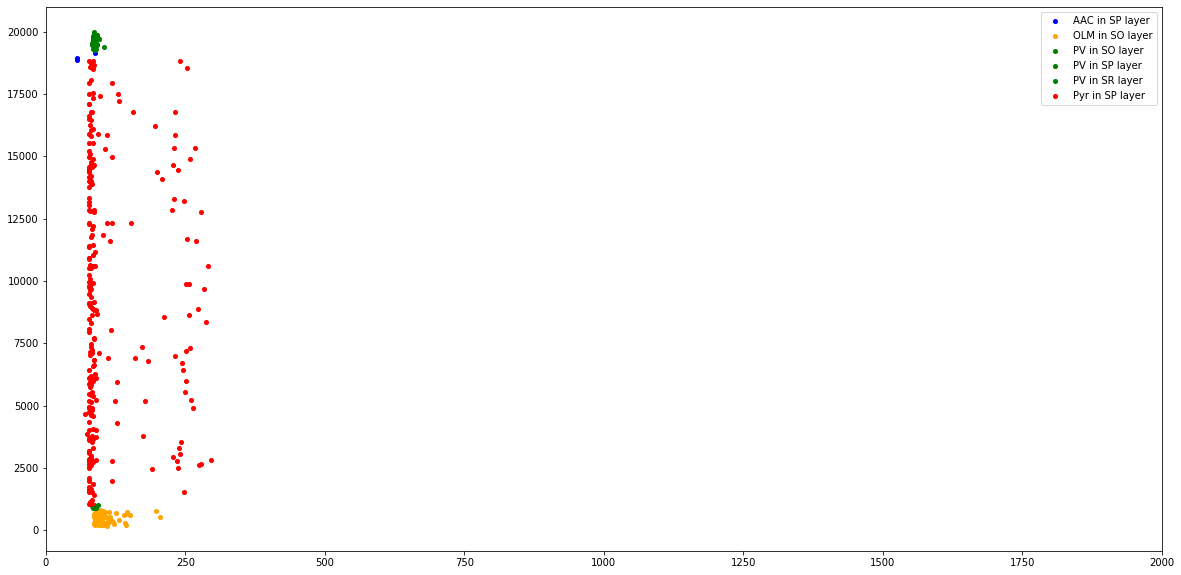

In [5]:

plt.figure(figsize=(20,10))
groups = spikesDFM.groupby('node_type_id')
color_map = {
    'AAC': 'blue',
    'OLM': 'orange',
    'Pyr': 'red',
    'PV' : 'green'
}

for name, group in groups:
    
    color = color_map.get(name.split(' ')[0])
    plt.plot(group.timestamps, group.node_ids,marker='o',linestyle="",markersize=4, label=name,color=color)
plt.legend(loc='upper right')
plt.xlim([0,2000])
#plt.yticks(list(set(spikesDFMM['positions2'])))
#plt.hlines(counts,xmin=0, xmax = max(spikesDFM['timestamps']))
#plt.savefig('raster.png',dpi=400)
plt.show()

In [38]:
spikesDFMM = spikesDFM.merge(nodesDF[['node_id','positions2']], left_on='node_ids',right_on='node_id',how='left')

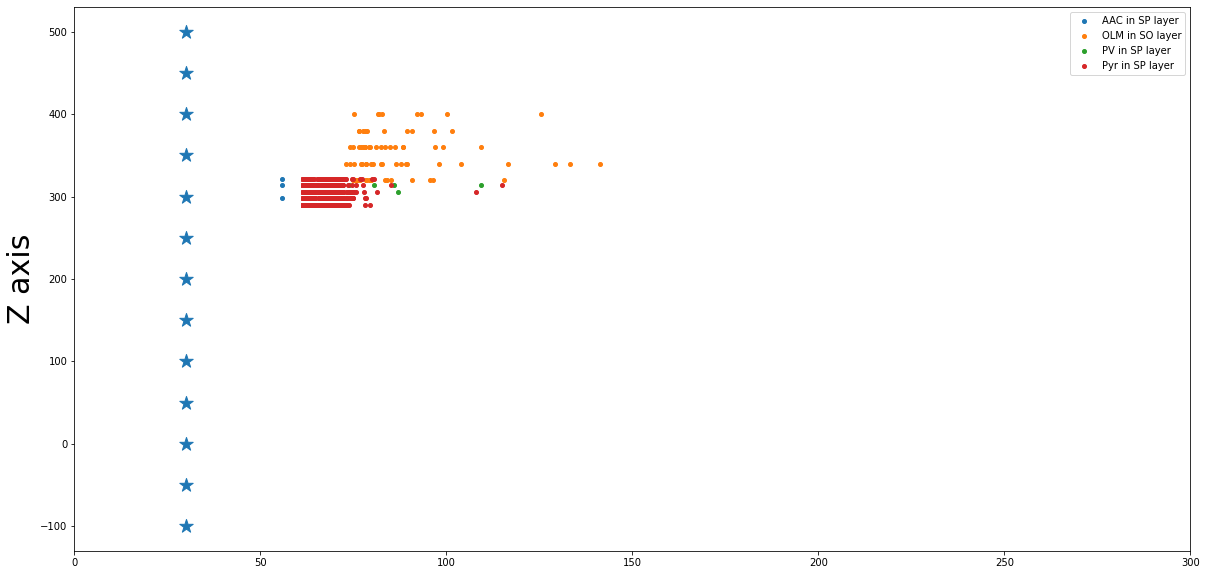

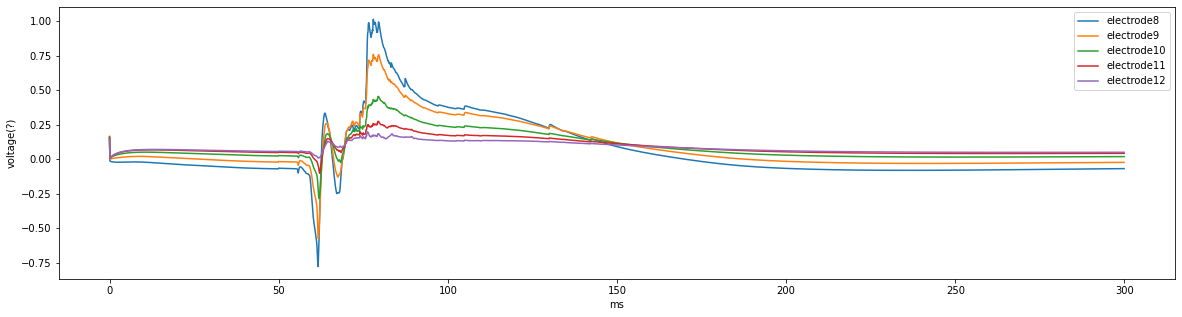

In [39]:
plt.figure(figsize=(20,10))
groups = spikesDFMM.groupby('node_type_id')
for name, group in groups:
    plt.plot(group.timestamps, group.positions2,marker='o',linestyle="",markersize=4, label=name)
plt.legend(loc='upper right')
plt.xlim([0,300])
plt.ylabel('Z axis',size=30)
electrode_pos = pd.read_csv("biophys_components/recXelectrodes/linear_electrode.csv",delimiter=" ")
plt.scatter(np.ones(len(electrode_pos['z_pos']))*30,electrode_pos['z_pos'],marker='*',s=200)

f = h5py.File('output/ecp.h5', 'r')
#f = h5py.File('/home/dpd4k4/CA1_Results/output_10s/ecp.h5', 'r')
data = f['ecp/data'][()]
time = f['ecp/time'][()]
f.close()
start,end = 0, 12000
plt.figure(figsize=(20,5))
for i in range(8,13):
    plt.plot(np.arange(time[0],time[1],time[2])[start:end],data[start:end,i],label=f"electrode{i}")
#plt.xlim([175,200])
plt.xlabel('ms')
#plt.ylim([0,0.1])
plt.ylabel('voltage(?)')
plt.legend()
plt.show()

# Frequency content

In [17]:
f = h5py.File('output/ecp.h5', 'r')
#f = h5py.File('/home/dpd4k4/CA1_Results/output_10s/ecp.h5', 'r')
data = f['ecp/data'][()]
time = f['ecp/time'][()]
f.close()

In [18]:
electrode = 8

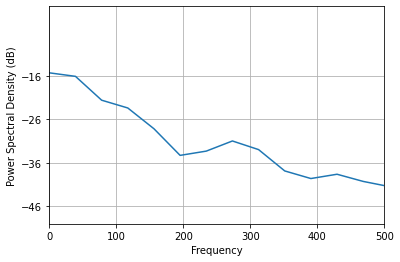

In [19]:


plt.psd(data[:,electrode],Fs = 10000, scale_by_freq=False)
plt.ylim([-50,0])
plt.xlim([0,500])
plt.show()

dB = 10 * log(P1)

Where P1 is the power of the measured signal 

In [463]:
dBdiff = 20
10**(dBdiff / 10 ) 

100.0

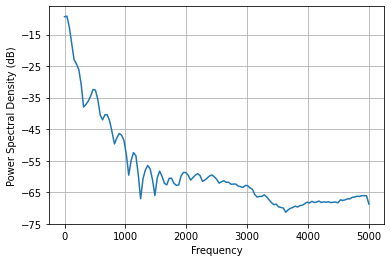

In [464]:
plt.psd(data[:,electrode],Fs = 10000, scale_by_freq=False)
plt.show()

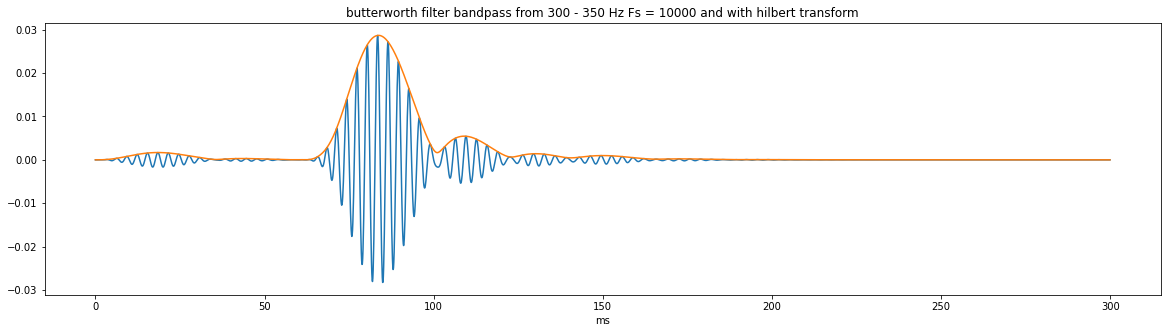

In [20]:
start,end = 0, 10000
Fs = 10000

lf, hf = 300,350

sos = signal.butter(4, [int(lf/(10000/Fs)),int(hf/(10000/Fs))], btype='bandpass', fs=10000, output='sos',analog=False)

filtered = signal.sosfilt(sos, data[start:end,0])
plt.figure(figsize=(20,5))
plt.plot(np.arange(time[0],time[1],time[2])[start:end],filtered)
analytical_signal = hilbert(filtered)
amplitude_envelope = np.abs(analytical_signal)
plt.plot(np.arange(time[0],time[1],time[2])[start:end],amplitude_envelope)
plt.title(f'butterworth filter bandpass from {lf} - {hf} Hz Fs = 10000 and with hilbert transform')
plt.xlabel('ms')

plt.show()

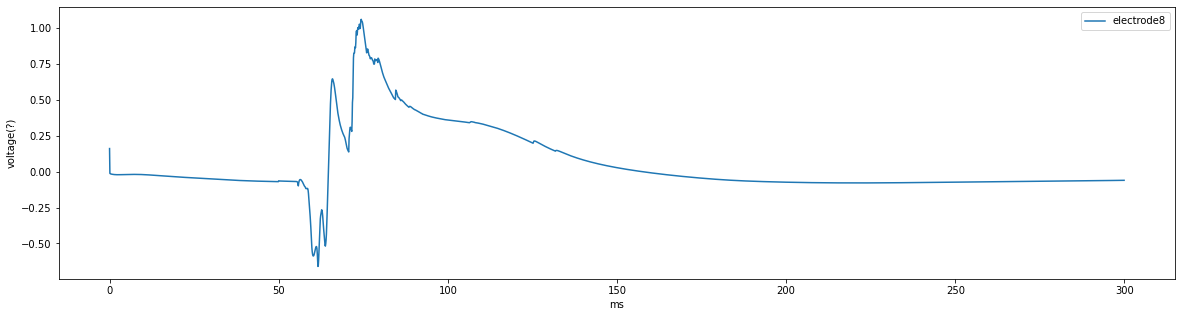

In [21]:




start,end = 0, 12000
electrode_number = 8


plt.figure(figsize=(20,5))
plt_time = np.arange(time[0],time[1],time[2])[start:end]
plt_data = data[start:end,electrode_number]

plt.plot(plt_time,plt_data,label=f"electrode{electrode_number}")

#plt.xlim([175,200])
plt.xlabel('ms')
#plt.ylim([0,0.1])
plt.ylabel('voltage(?)')
plt.legend()
plt.show()

In [22]:
import pywt
from scipy import signal

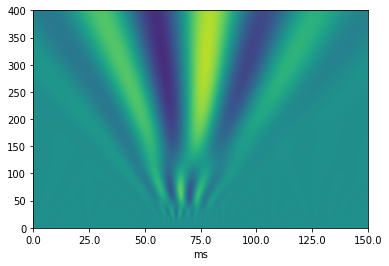

In [23]:
t = plt_time
sig = plt_data
widths = np.arange(1,1000)
cwtmatr, freqs = pywt.cwt(sig, widths, 'morl')
plt.imshow(cwtmatr,   aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max()) 

plt.ylim([0,400])
plt.xlim([0,1500])
tick_locations = np.array([0, 250, 500, 750, 1000, 1250, 1500])  # Adjust as needed
tick_labels = tick_locations / 10  # Divide by the desired scaling factor

# Set the x-axis ticks
plt.xticks(tick_locations, tick_labels)
plt.xlabel('ms')
plt.show()

# get a sample of vreports from each type of spiking cell

In [9]:
f = h5py.File(os.path.join('network','biophysical_nodes.h5'), 'r')
nodesDF = SaveDataToDF(f)
cellLocations = pd.read_csv('cell_locations.csv')#this was for the old build, i'm just reading it instead of writing the list coz lazy
idNames = np.unique(nodesDF['node_type_id'])
cellNames = np.unique(cellLocations['Cell type'])
array = cellLocations['Cell type']
idxs = np.unique(cellLocations['Cell type'],return_index=True)[1]
cellNames = [array[index] for index in sorted(idxs)]#use the names in the order in which the id's appear

nodesDF = nodesDF.replace({'node_type_id':idNames},{'node_type_id':cellNames})

f = h5py.File(os.path.join('output','spikes.h5'), 'r')

spikesDF = SaveDataToDF(f) 

namesList = []
for i in range(len(spikesDF['node_ids'])):
    namesList.append(nodesDF['node_type_id'][spikesDF['node_ids'][i]])
spikesDFM = pd.concat([spikesDF,pd.Series(namesList)],axis=1)
spikesDFM.columns = ['node_ids','timestamps','node_type_id']

f = h5py.File(os.path.join("output",'v_report.h5'), 'r')
vreports = SaveDataToDF(f)

In [10]:
AAC_ids = np.array(spikesDFM[spikesDFM['node_type_id'].str.contains('AAC')]['node_ids'])
OLM_ids = np.array(spikesDFM[spikesDFM['node_type_id'].str.contains('OLM')]['node_ids'])
PV_ids = np.array(spikesDFM[spikesDFM['node_type_id'].str.contains('PV')]['node_ids'])
Pyr_ids = np.array(spikesDFM[spikesDFM['node_type_id'].str.contains('Pyr')]['node_ids'])

In [11]:

def plot_cells(vreports,vreport_keys,title):
    if len(vreport_keys) < 3:
        print(f"fewer than 3 spiking {title} cells")
        return None
    rng = np.random.default_rng()
    random_keys = rng.choice(vreport_keys,size=3,replace=False)
    idxs = vreports['node_ids'][vreports['node_ids'].isin(random_keys)].index
    vreport_keys = [f"data{str(int(idxs[i]))}" for i in range(len(idxs))]
        
    subtype_vreports = vreports[vreport_keys]
    fig,axs = plt.subplots(1,3,figsize=(10,2))
    for j in range(0,3):
        ax = axs[j]
        ax.plot(subtype_vreports[subtype_vreports.keys()[j]],label= subtype_vreports.keys()[j])
        ax.set_ylim([-70,20])
        ax.legend()

    fig.suptitle(title)
    plt.show()

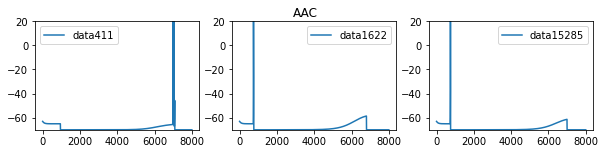

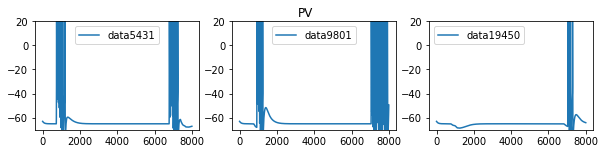

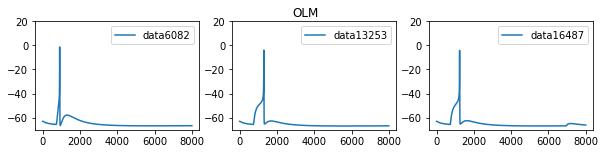

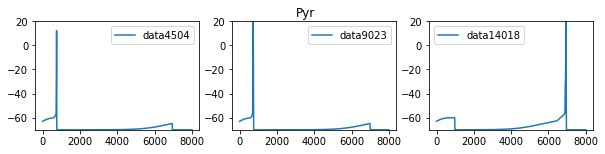

In [12]:
plot_cells(vreports,AAC_ids,'AAC')
plot_cells(vreports,PV_ids,'PV')
plot_cells(vreports,OLM_ids,'OLM')
plot_cells(vreports,Pyr_ids,'Pyr')

In [21]:
plot_cells(vreports,Pyr_ids,'Pyr')

fewer than 3 spiking Pyr cells


# check the outputs for abnormalities

In [6]:
f = h5py.File(os.path.join("output",'v_report.h5'), 'r')
vreports = SaveDataToDF(f)
all_reports = np.array(vreports.iloc[:,0:20002].dropna())

In [7]:
failed_idxs,fail_high_idxs,fail_low_idxs = [],[],[]
np.random.seed(0)
for i in range(all_reports.shape[1]):
    
    test = all_reports[:,i]
    rest = np.mean(test[200:300])
    end = test[-50:]
    rnormal = np.random.normal(np.mean(rest),1,1000)
    test_high = np.mean(end) > (rest + np.std(rnormal)*1)
    test_low = np.mean(end) < (rest - np.std(rnormal)*1)
    
    if test_high:
        fail_high_idxs.append(i)
    elif test_low:
        fail_low_idxs.append(i)
    if test_high or test_low:
        failed_idxs.append(i)
    
print(f"too high: {len(fail_high_idxs)}")
print(f"too low: {len(fail_low_idxs)}")

all_problems = vreports.iloc[:,failed_idxs]
high_problems = vreports.iloc[:,fail_high_idxs]
low_problems = vreports.iloc[:,fail_low_idxs]

too high: 162
too low: 19388


Index(['data68', 'data123', 'data314', 'data350', 'data604', 'data607',
       'data743', 'data838', 'data850', 'data865',
       ...
       'data18603', 'data18812', 'data18958', 'data19018', 'data19173',
       'data19190', 'data19287', 'data19746', 'data19969', 'data19977'],
      dtype='object', length=199)

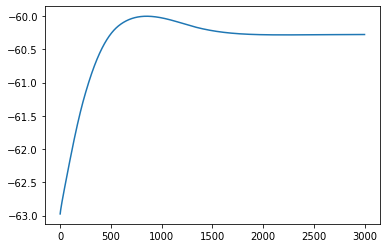

In [112]:
plt.plot(vreports['data10250'])
#plt.ylim([-40.8,-41.2])
high_problems.keys()

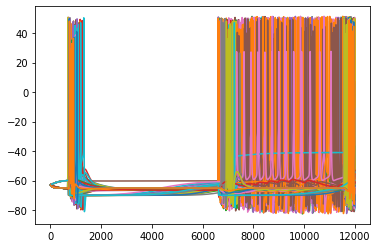

In [8]:
plt.plot(high_problems)
plt.show()

In [117]:
def plot_all_cells(nodesDF, vreports,celltype):
    cell_ids = nodesDF[nodesDF['node_type_id'].str.contains(celltype)]
    num_cells = cell_ids.shape[0]
    end_idx = num_cells - 1
    plt.plot(vreports.iloc[:,cell_ids['node_id'].iloc[0:end_idx]])
    plt.show()

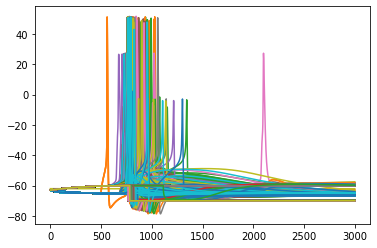

In [118]:
plot_all_cells(nodesDF,vreports,'Pyr')

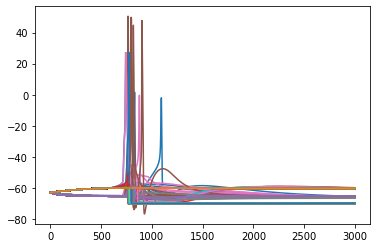

In [119]:
plot_all_cells(nodesDF,vreports,'AAC')

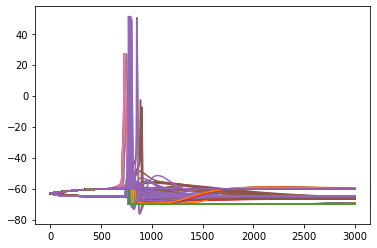

In [120]:
plot_all_cells(nodesDF,vreports,'PV')

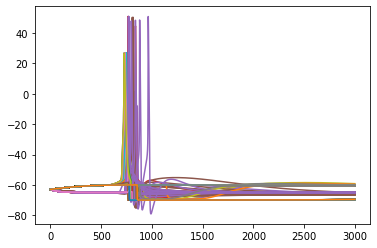

In [121]:
plot_all_cells(nodesDF,vreports,'OLM')

In [47]:
failed_node_ids = vreports['node_ids'].iloc[failed_idxs]
failed_node_ids.columns=['node_id']
failed_node_ids = pd.DataFrame(failed_node_ids)

fail_high_node_ids = vreports['node_ids'].iloc[fail_high_idxs]
fail_high_node_ids.columns=['node_id']
fail_high_node_ids = pd.DataFrame(fail_high_node_ids)

fail_low_node_ids = vreports['node_ids'].iloc[fail_low_idxs]
fail_low_node_ids.columns=['node_id']
fail_low_node_ids = pd.DataFrame(fail_low_node_ids)

In [48]:
df1 = fail_low_node_ids.merge(nodesDF[['node_id', 'node_type_id']], left_on='node_ids', right_on='node_id',how='left')
df2 = fail_high_node_ids.merge(nodesDF[['node_id', 'node_type_id']], left_on='node_ids', right_on='node_id',how='left')
df3 = failed_node_ids.merge(nodesDF[['node_id', 'node_type_id']], left_on='node_ids', right_on='node_id',how='left')

In [50]:
df2.groupby('node_type_id').apply(len)

node_type_id
Pyr in SP layer    918
dtype: int64

In [51]:
df2

,node_ids,node_id,node_type_id
0,4100.0,4100,Pyr in SP layer
1,10250.0,10250,Pyr in SP layer
2,12300.0,12300,Pyr in SP layer
3,14350.0,14350,Pyr in SP layer
4,16400.0,16400,Pyr in SP layer
5,18450.0,18450,Pyr in SP layer
6,4150.0,4150,Pyr in SP layer
7,8250.0,8250,Pyr in SP layer
8,12350.0,12350,Pyr in SP layer
9,18500.0,18500,Pyr in SP layer


### check output for cells which spike more than once per stimulation

### check synaptic weights for their distribution

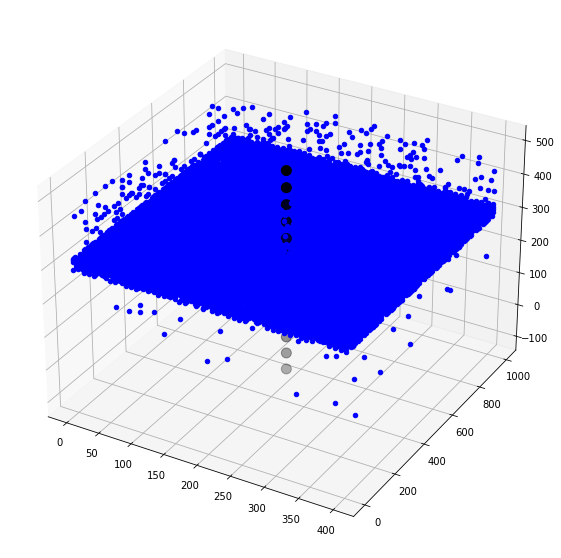

In [22]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
for i in range(0,nodesDF.shape[0]):
    ax.scatter(nodesDF.iloc[i]['positions0'],nodesDF.iloc[i]['positions1'],nodesDF.iloc[i]['positions2'],color = 'blue')
ax.scatter(electrode_pos['x_pos'],electrode_pos['y_pos'],electrode_pos['z_pos'],color = 'black',s=100)    

In [109]:
nodesDF.to_csv('nodesDF.csv')

# check voltages in other compartments

In [51]:
f = h5py.File(os.path.join("output",'v_report2.h5'), 'r')
node_ids = f['report/biophysical/mapping/node_ids'][()]
data = f['report/biophysical/data'][()]
vreports = f.visit(print)
f.close()

report
report/biophysical
report/biophysical/data
report/biophysical/mapping
report/biophysical/mapping/element_ids
report/biophysical/mapping/element_pos
report/biophysical/mapping/index_pointer
report/biophysical/mapping/node_ids
report/biophysical/mapping/time


# edit the h5 network synapses directly

In [293]:
from bmtk.simulator import bionet
config_file = 'simulation_configLFP.json'
conf = bionet.Config.from_json(config_file, validate=True)
graph = bionet.BioNetwork.from_config(conf)

In [517]:
edges = graph._edge_populations

In [536]:
graph._edge_adaptors

{'sonata': bmtk.simulator.bionet.sonata_adaptors.BioEdgeAdaptor}

In [429]:
nodesDF.groupby('node_type_id').apply(len)

node_type_id
AAC in SO layer       20
AAC in SP layer       59
AAC in SR layer        6
OLM in SO layer       95
PV in SO layer        76
PV in SP layer       223
PV in SR layer        19
Pyr in SP layer    17800
dtype: int64

In [421]:
from math import ceil
# amount of cells
NetNo = 20000
#NetNo = 5000
IN_num = NetNo*.11#about 11% of all neurons are interneurons in this network (Bezaire 2013). We are only modeling 2, so omit the others, or substitute PV and OLM for all
PN_num = NetNo -  IN_num


numOLM = .043*IN_num # 4% of all INs are OLMs
numPV = .144*IN_num
numPyr = PN_num
numAAC = 0.038*IN_num


# amount of cells per layer
numAAC_inSO = int(ceil(numAAC*0.238))  # sometimes the num will be <1 so always round up so there is at least one.
numPV_inSO = int(ceil(numPV*0.238))
numOLM_inSO = int(ceil(numOLM))

numAAC_inSP = int(ceil(numAAC*0.7))
numPV_inSP = int(ceil(numPV*0.702))
numPyr_inSP = int(ceil(numPyr))

numAAC_inSR = int(ceil(numAAC*0.061))
numPV_inSR = int(ceil(numPV*0.0597))

In [422]:
numAAC_inSO

20

In [423]:
numPV_inSO

76

In [424]:
numOLM_inSO

95

In [425]:
numAAC_inSP

59

In [495]:
pop

In [44]:
f = h5py.File(os.path.join('network','biophysical_biophysical_edges.h5'), 'r')
edgesDF = SaveDataToDF(f)

In [240]:
source = 'Pyr'
target = 'PV'

In [241]:
SIDXS = nodesDF['node_id'][nodesDF['node_type_id'].str.contains(source)]#the node number is also the index in the NODES df, not the EDGES
TIDXS = nodesDF['node_id'][nodesDF['node_type_id'].str.contains(target)]

In [242]:
sourcesList = []
for i in range(len(SIDXS.values)):
    sourcesList.append(edgesDF['source_node_id'][edgesDF['source_node_id']==[SIDXS.values[i]]].index)
sourcesArray = np.concatenate(sourcesList)

edgesDFSources = edgesDF.iloc[sourcesArray]

targetsList = []
for i in range(len(TIDXS.values)):
    targetsList.append(edgesDFSources['target_node_id'][edgesDFSources['target_node_id']==[TIDXS.values[i]]].index)
targetsArray = np.concatenate(targetsList)

"""
targetsList = []
for i in range(len(TIDXS.values)):
    targetsList.append(edgesDF['target_node_id'][edgesDF['target_node_id']==[TIDXS.values[i]]].index)
targetsArray = np.concatenate(targetsList)
"""
sharedArray = np.intersect1d(sourcesArray, targetsArray)#these are all the indices with source == source and target == target. These are what need modified

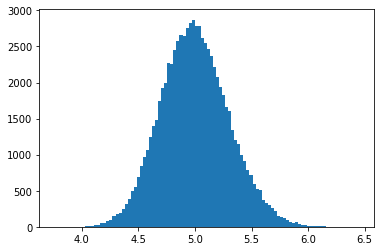

In [243]:
plt.hist(edgesDF.iloc[sharedArray]['syn_weight'],bins=100)
plt.show()

In [211]:
TIDXS = nodesDF['node_id'][nodesDF['node_type_id'].str.contains('PV')]
targetsList = []
for i in range(len(TIDXS.values)):
    targetsList.append(edgesDF['target_node_id'][edgesDF['target_node_id']==[TIDXS.values[i]]].index)
targetsArray = np.concatenate(targetsList)

edgesDFTargets = edgesDF.iloc[targetsArray]

In [218]:
np.unique(edgesDFTargets['target_node_id'])

array([  115.,   116.,   117.,   118.,   119.,   120.,   121.,   122.,
         123.,   124.,   125.,   126.,   127.,   128.,   129.,   130.,
         131.,   132.,   133.,   134.,   135.,   136.,   137.,   138.,
         139.,   140.,   141.,   142.,   143.,   144.,   145.,   146.,
         147.,   148.,   149.,   150.,   151.,   152.,   153.,   154.,
         155.,   156.,   157.,   158.,   159.,   160.,   161.,   162.,
         163.,   164.,   165.,   166.,   167.,   168.,   169.,   170.,
         171.,   172.,   173.,   174.,   175.,   176.,   177.,   178.,
         179.,   180.,   181.,   182.,   183.,   184.,   185.,   186.,
         187.,   188.,   189.,   190., 18050., 18051., 18052., 18053.,
       18054., 18055., 18056., 18057., 18058., 18059., 18060., 18061.,
       18062., 18063., 18064., 18065., 18066., 18067., 18068., 18069.,
       18070., 18071., 18072., 18073., 18074., 18075., 18076., 18077.,
       18078., 18079., 18080., 18081., 18082., 18083., 18084., 18085.,
      

In [27]:
simTime = np.arange(0,300,0.1)

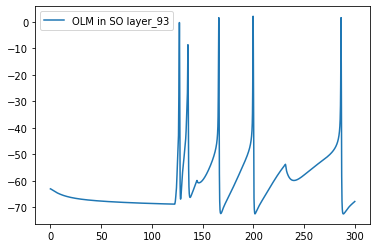

In [93]:
f = h5py.File(os.path.join("output",'v_report_axon.h5'), 'r')
vreportsA = SaveDataToDF(f)

In [45]:
f = h5py.File(os.path.join('network','biophysical_biophysical_edges.h5'), 'r')
sourceID = f['edges/biophysical_to_biophysical/source_node_id'][()]
targetID = f['edges/biophysical_to_biophysical/target_node_id'][()]
f.close()
sourceID[targetID == 50]

In [196]:
sourceID[targetID == 50]

array([   36,    41,    48, ..., 17902, 17906, 17921], dtype=uint64)

In [146]:
f = h5py.File(os.path.join("output",'v_report_axon.h5'), 'r')
res = f['report/biophysical/data'][()]
f.close()
allStuff = []
for i in range(1,11):
    allStuff.append(res[:,i])

In [147]:
allStuff = np.concatenate(allStuff)

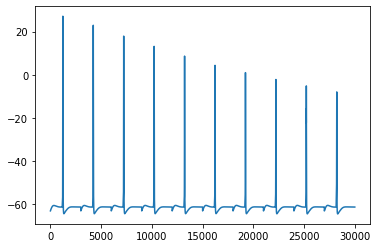

In [148]:
plt.plot(allStuff)
plt.show()

In [14]:
gid = 5
plt.figure(figsize=(15,10))
cellNo = vreports['node_ids'][vreports['node_ids'] == gid].keys()[0]
plt.plot(simTime,vreports['data'+str(cellNo)][vreports['data'+str(cellNo)].isna()==False],label='soma')
#plt.plot(simTime,axonsDF['data6'][axonsDF['data6'].isna()==False],label='axon')
plt.legend()
plt.ylim([-80,60])
print(nodesDF['node_type_id'][vreports['node_ids'][cellNo]])
print(cellNo)

NameError: name 'simTime' is not defined

<Figure size 1080x720 with 0 Axes>

### Connectivity

In [81]:
from math import ceil
NetNo = 3000
IN_num = NetNo*.11#about 11% of all neurons are interneurons in this network (Bezaire 2013). We are only modeling 2, so omit the others, or substitute PV and OLM for all
PN_num = NetNo -  IN_num


numOLM = .043*IN_num # 4% of all INs are OLMs
numPV = .144*IN_num
numPyr = PN_num
numAAC = 0.038*IN_num


# amount of cells per layer
numAAC_inSO = int(ceil(numAAC*0.238))  # sometimes the num will be <1 so always round up so there is at least one.
numPV_inSO = int(ceil(numPV*0.238))
numOLM_inSO = int(ceil(numOLM))

numAAC_inSP = int(ceil(numAAC*0.7))
numPV_inSP = int(ceil(numPV*0.702))
numPyr_inSP = int(ceil(numPyr))

numAAC_inSR = int(ceil(numAAC*0.061))
numPV_inSR = int(ceil(numPV*0.0597))

numDict = {"AAC in SO layer":numAAC_inSO,
           "PV in SO layer":numPV_inSO,
           "OLM in SO layer":numOLM_inSO,
           "AAC in SP layer":numAAC_inSP,
           "PV in SP layer":numPV_inSP,
           "Pyr in SP layer":numPyr_inSP,
           "AAC in SR layer":numAAC_inSR,
           "PV in SR layer":numPV_inSR,
          }

In [88]:
total = 0
for key in numDict.keys():
    total+=numDict[key]
total

2747

In [20]:
f = h5py.File(os.path.join('updated_conns','biophysical_biophysical_edges.h5'), 'r')
synsDF = SaveDataToDF(f) 

In [16]:
def percent(item):
    length = len(item)
    
    for key in numDict:
        #print(str(item['source'].iloc[0]))
        #print('{0} {1} = {2}'.format(key,str(item['source'].iloc[0]),key == str(item['source'].iloc[0])))
        if str(key) == str(item['source'].iloc[0]):
            
            return length/numDict[key]


In [22]:
conns = pd.concat([pd.DataFrame(np.array(nodesDF['node_type_id'][synsDF['source_node_id']])), pd.DataFrame(np.array(nodesDF['node_type_id'][synsDF['target_node_id']]))],axis=1)
conns.columns = ['source','target']
#groupConns = conns.groupby(['source','target']).agg(len)
groupConns = conns.groupby(["source","target"]).agg(len)
groupConnspercent = conns.groupby(["source","target"]).agg(percent)


In [23]:
groupConns

source           target         
AAC in SO layer  PV in SP layer         4
                 Pyr in SP layer      267
AAC in SP layer  OLM in SO layer        1
                 PV in SO layer         6
                 Pyr in SP layer       61
AAC in SR layer  PV in SO layer         1
                 Pyr in SP layer       10
OLM in SO layer  AAC in SP layer        3
                 PV in SP layer        23
                 Pyr in SP layer     1519
PV in SO layer   AAC in SP layer        5
                 AAC in SR layer        2
                 OLM in SO layer        3
                 PV in SO layer         3
                 PV in SP layer        15
                 PV in SR layer         2
                 Pyr in SP layer     1469
PV in SP layer   OLM in SO layer        5
                 PV in SO layer        29
                 Pyr in SP layer      250
PV in SR layer   PV in SO layer         6
                 Pyr in SP layer       15
Pyr in SP layer  AAC in SO layer       61
 

In [481]:
groupConnspercent

source           target         
AAC in SO layer  Pyr in SP layer    681.450000
AAC in SP layer  Pyr in SP layer    769.864407
AAC in SR layer  Pyr in SP layer    664.833333
OLM in SO layer  AAC in SO layer      0.684211
                 AAC in SP layer      2.873684
                 AAC in SR layer      0.189474
                 OLM in SO layer      4.463158
                 PV in SO layer       3.178947
                 PV in SP layer       9.768421
                 PV in SR layer       0.757895
                 Pyr in SP layer    822.926316
PV in SO layer   AAC in SO layer      1.552632
                 AAC in SP layer      4.710526
                 AAC in SR layer      0.355263
                 PV in SO layer       5.881579
                 PV in SP layer      16.815789
                 PV in SR layer       1.355263
                 Pyr in SP layer    538.250000
PV in SP layer   AAC in SO layer      1.408072
                 AAC in SP layer      4.704036
                 AAC in SR 

In [82]:
numDict

{'numAAC_inSO': 20,
 'numPV_inSO': 76,
 'numOLM_inSO': 95,
 'numAAC_inSP': 59,
 'numPV_inSP': 223,
 'numPyr_inSP': 17800,
 'numAAC_inSR': 6,
 'numPV_inSR': 19}

In [ ]:
groupConns['']

In [270]:
conns = pd.concat([pd.DataFrame(np.array(nodesDF['node_type_id'][synsDF['source_node_id']])), pd.DataFrame(np.array(nodesDF['node_type_id'][synsDF['target_node_id']]))],axis=1)
conns.columns = ['source','target']
groupConns = conns.groupby(['source','target']).apply(len).reset_index(name='#conns')
groupConns

,source,target,#conns
0,AAC in SO layer,Pyr in SP layer,13629
1,AAC in SP layer,Pyr in SP layer,45422
2,AAC in SR layer,Pyr in SP layer,3989
3,OLM in SO layer,AAC in SO layer,65
4,OLM in SO layer,AAC in SP layer,273
5,OLM in SO layer,AAC in SR layer,18
6,OLM in SO layer,OLM in SO layer,424
7,OLM in SO layer,PV in SO layer,302
8,OLM in SO layer,PV in SP layer,928
9,OLM in SO layer,PV in SR layer,72


In [71]:
for source in groupConns['source']:
    if 

0      13629
1      45422
2       3989
3         65
4        273
5         18
6        424
7        302
8        928
9         72
10     78178
11       118
12       358
13        27
14       447
15      1278
16       103
17     40907
18       314
19      1049
20       104
21      1224
22      3848
23       348
24    123302
25        26
26       105
27         2
28        98
29       322
30        40
31     11061
32      1836
33      6091
34       521
35    123897
36     17949
37     54725
38      4856
Name: #conns, dtype: int64

In [43]:
groupConns.keys()

MultiIndex(levels=[['AAC in SO layer', 'AAC in SP layer', 'AAC in SR layer', 'OLM in SO layer', 'PV in SO layer', 'PV in SP layer', 'PV in SR layer', 'Pyr in SP layer'], ['AAC in SO layer', 'AAC in SP layer', 'AAC in SR layer', 'OLM in SO layer', 'PV in SO layer', 'PV in SP layer', 'PV in SR layer', 'Pyr in SP layer']],
           labels=[[0, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7], [7, 7, 7, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 4, 5, 6, 7, 0, 1, 2, 4, 5, 6, 7, 0, 1, 2, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6]],
           names=['source', 'target'])

In [47]:
groupConns.values

array([ 13629,  45422,   3989,     65,    273,     18,    424,    302,
          928,     72,  78178,    118,    358,     27,    447,   1278,
          103,  40907,    314,   1049,    104,   1224,   3848,    348,
       123302,     26,    105,      2,     98,    322,     40,  11061,
         1836,   6091,    521, 123897,  17949,  54725,   4856])

In [61]:
groupConns.keys

<bound method Series.keys of source           target         
AAC in SO layer  Pyr in SP layer     13629
AAC in SP layer  Pyr in SP layer     45422
AAC in SR layer  Pyr in SP layer      3989
OLM in SO layer  AAC in SO layer        65
                 AAC in SP layer       273
                 AAC in SR layer        18
                 OLM in SO layer       424
                 PV in SO layer        302
                 PV in SP layer        928
                 PV in SR layer         72
                 Pyr in SP layer     78178
PV in SO layer   AAC in SO layer       118
                 AAC in SP layer       358
                 AAC in SR layer        27
                 PV in SO layer        447
                 PV in SP layer       1278
                 PV in SR layer        103
                 Pyr in SP layer     40907
PV in SP layer   AAC in SO layer       314
                 AAC in SP layer      1049
                 AAC in SR layer       104
                 PV in SO layer    

In [252]:
sum(conns['source']=='AAC in SP layer')

0

In [80]:
i = 2
nodesDF['node_type_id'][nodesDF['node_id'][sourceID[targetID == AACIDXS.iloc[i]]]]

NameError: name 'AACIDXS' is not defined

In [158]:
f = h5py.File(os.path.join(pathname,'biophysical_biophysical_edges.h5'), 'r')
edgesDF = SaveDataToDF(f) 

### find the number and type of cells which synapse onto a particular cell:

In [54]:
f = h5py.File(os.path.join('updated_conns','biophysical_biophysical_edges.h5'), 'r')
synsDF = SaveDataToDF(f) 


NameError: name 'pathname' is not defined

In [55]:
f = h5py.File(os.path.join('network','biophysical_nodes.h5'), 'r')
nodesDF = SaveDataToDF(f)
cellLocations = pd.read_csv('cell_locations.csv')
idNames = np.unique(nodesDF['node_type_id'])
cellNames = np.unique(cellLocations['Cell type'])
array = cellLocations['Cell type']
idxs = np.unique(cellLocations['Cell type'],return_index=True)[1]
cellNames = [array[index] for index in sorted(idxs)]#use the names in the order in which the id's appear
nodesDF = nodesDF.replace({'node_type_id':idNames},{'node_type_id':cellNames})

In [79]:
cellID = 1358
target_synsDF = synsDF[synsDF['target_node_id']==cellID]
target_synsDFM = target_synsDF.drop(['edge_group_id','edge_group_index','range_to_edge_id0','range_to_edge_id1','node_id_to_range0','edge_type_id','node_id_to_range1'],axis=1)
nodesDFM.columns = ['x_pos','y_pos','z_pos','node_group_id','node_group_index','source_node_id','source_node_type_id']
target_synsDFMM = target_synsDFM.merge(nodesDFM[['source_node_id','source_node_type_id']],'left')
target_synsDFMM.groupby('source_node_type_id').apply(len)

source_node_type_id
AAC in SO layer    11
AAC in SP layer    19
AAC in SR layer     3
OLM in SO layer    22
PV in SO layer      8
PV in SP layer     25
PV in SR layer      2
dtype: int64

# average number of a type of connection:

In [172]:
f = h5py.File(os.path.join('network','biophysical_nodes.h5'), 'r')
nodesDF = SaveDataToDF(f)
cellLocations = pd.read_csv('cell_locations.csv')
idNames = np.unique(nodesDF['node_type_id'])
cellNames = np.unique(cellLocations['Cell type'])
array = cellLocations['Cell type']
idxs = np.unique(cellLocations['Cell type'],return_index=True)[1]
cellNames = [array[index] for index in sorted(idxs)]#use the names in the order in which the id's appear
nodesDF = nodesDF.replace({'node_type_id':idNames},{'node_type_id':cellNames})
cell_type = 'Pyr'
cell_type_ids = nodesDF[nodesDF['node_type_id'].str.contains(cell_type)]['node_id']
synsDF_of_cell_type = synsDF[synsDF['target_node_id'].isin(cell_type_ids)]
nodesDFM = nodesDF
nodesDFM.columns = ['x_pos','y_pos','z_pos','node_group_id','node_group_index','source_node_id','source_node_type_id']
synsDF_with_labels = synsDF_of_cell_type.merge(nodesDFM[['source_node_id','source_node_type_id']],'left')

def avg(group):
    return pd.Series({'avg': len(group)/len(cell_type_ids)})
avgs = synsDF_with_labels.groupby('source_node_type_id').apply(avg).reset_index()
avgs

,source_node_type_id,avg
0,AAC in SO layer,6.311124
1,AAC in SP layer,19.046910
2,AAC in SR layer,1.418708
3,OLM in SO layer,30.942584
4,PV in SO layer,6.354831
5,PV in SP layer,19.393596
6,PV in SR layer,1.625618


In [216]:
AAC2target = round(np.mean(avgs[avgs['source_node_type_id'].str.contains('AAC')]),3)
OLM2target = round(np.mean(avgs[avgs['source_node_type_id'].str.contains('OLM')]),3)
PV2target = round(np.mean(avgs[avgs['source_node_type_id'].str.contains('PV')]),3)
Pyr2target = round(np.mean(avgs[avgs['source_node_type_id'].str.contains('Pyr')]),3)

In [237]:
def getVal(key):
    value = round(np.mean(avgs[avgs['source_node_type_id'].str.contains(key)]),3)
    print(value['avg'])
    if np.isnan(value['avg']):
        return 0
    else:
        return value

In [190]:

print(f"on avg there are {AAC2target} AAC's synapsing onto one {cell_type}")
print(f"on avg there are {OLM2target} OLM's synapsing onto one {cell_type}")                            
print(f"on avg there are {PV2target} PV's synapsing onto one {cell_type}")
#print(f"on avg there are {Pyr2target} Pyr's synapsing onto one {cell_type}")

on avg there are 8.926 AAC's synapsing onto one Pyr
on avg there are 30.943 OLM's synapsing onto one Pyr
on avg there are 9.125 PV's synapsing onto one Pyr


# LFP Processing

In [55]:
from scipy.signal import butter, lfilter, resample, filtfilt
from scipy.stats import zscore
from scipy.fft import fft, fftfreq, fftshift

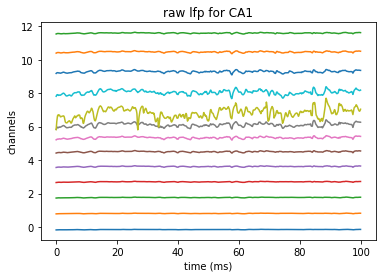

In [40]:
tsim = 300
lfp_file = "output/ecp.h5"
f = h5py.File(lfp_file,'r')
lfp = list(f['ecp']['data'])
lfp_arr = np.asarray(lfp)
lfp = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
for i in range(13):
    lfp[i] = lfp_arr[:,i]
    lfp[i] = [(x*10)+i for x in lfp[i]]
    temp = lfp[i]
    temp = temp[1500:2500]
    plt.plot(np.arange(0,100,0.1),temp)
plt.xlabel('time (ms)')
plt.ylabel('channels')
plt.title("raw lfp for CA1")
plt.show()

In [42]:
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

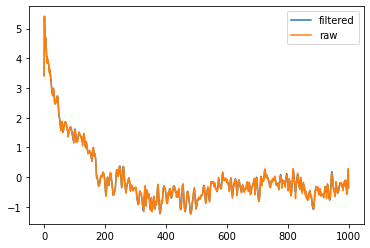

In [47]:
# Filter requirements.
order = 6
fs = 10000       # sample rate, Hz
cutoff = 500  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
data=lfp[0]

y = butter_lowpass_filter(data, cutoff, fs, order)
filtered= resample(y, 1000)
filtered = zscore(filtered)

data = resample(data, 1000)
raw = zscore(data)

plt.plot(np.arange(0,1000, 1), filtered, label='filtered')
plt.plot(np.arange(0,1000, 1), raw, label='raw')

plt.legend()
plt.show()

In [52]:
t = np.arange(len(filtered))

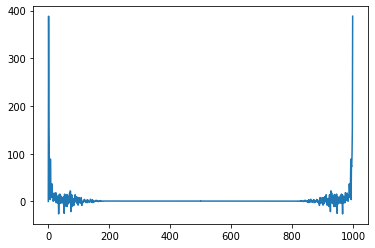

In [53]:
fftRes = scipy.fft.fft(filtered)
plt.plot(t,fftRes.real)

In [113]:
hist, bin_edges = np.histogram(fftRes.real/max(fftRes.real), bins=200)

In [57]:

sp = fftshift(fft(filtered))
freq = fftshift(fftfreq(t.shape[-1]))

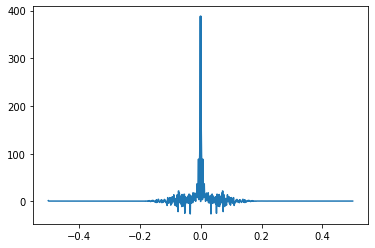

In [68]:
plt.plot(freq,sp.real)

In [201]:
nonzeros = np.array([r for r in fftRes if r != 0])

In [122]:
hist, bin_edges = np.histogram(fftRes.real,bins=200)

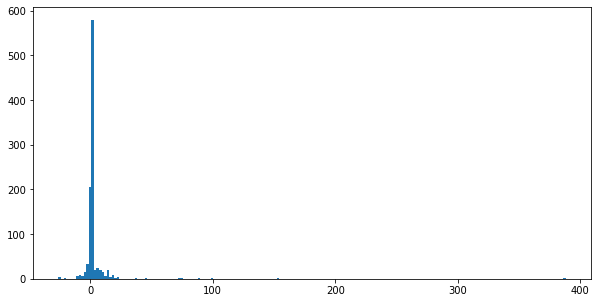

In [203]:
plt.figure(figsize=(10,5))
plt.hist(nonzeros.real,bins=200)
plt.show()

# TESTING

In [23]:
def gen_distribution(m,s):
    mean = m
    std = s
    log_weight = float(np.random.lognormal(mean,std, 1)*0.001)
    if log_weight >= float(3*m):

        log_weight = float(3*m)


    return float(log_weight)

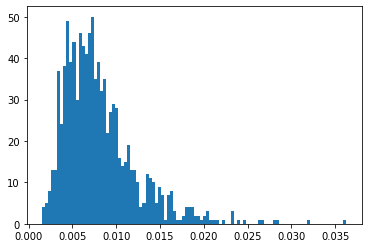

In [29]:
dist = np.array([gen_distribution(2,0.5) for i in range(1000)])
plt.hist(dist,bins=100)
plt.show()